# **INFO284 Machine Learning Exam, spring 2025**

**Table of contents**<a id='toc0_'></a>    
- [**Task 1 - Sentiment analysis**](#toc1_)    
  - [**Importing libraries**](#toc1_1_)    
  - [**Helper functions**](#toc1_2_)    
    - [**Heatmap visualization**](#toc1_2_1_)    
    - [**Precision-Recall curve**](#toc1_2_2_)    
    - [**Top features visualization**](#toc1_2_3_)    
  - [**Load data**](#toc1_3_)    
  - [**Exploring the dataset**](#toc1_4_)    
    - [**Basic structure**](#toc1_4_1_)    
    - [**Review scores distribution**](#toc1_4_2_)    
  - [**Cleaning review texts and finding threshold**](#toc1_5_)    
      - [**Attempt to find a limit for positive and negative reviews**](#toc1_5_1_1_)    
      - [**Cleaning blank review columns**](#toc1_5_1_2_)    
  - [**Exploring reviews written in foreign languages**](#toc1_6_)    
  - [**Transforming review scores to binary values**](#toc1_7_)    
  - [**Preprocessing the review text**](#toc1_8_)    
    - [**Stopwords removal**](#toc1_8_1_)    
    - [**Combining and Cleaning the review texts**](#toc1_8_2_)    
    - [**Converting numbers to words**](#toc1_8_3_)    
    - [**Tokenization**](#toc1_8_4_)    
    - [**Lemmatization**](#toc1_8_5_)    
  - [**Splitting the data**](#toc1_9_)    
  - [**MultinomialNB Model**](#toc1_10_)    
    - [**Model building**](#toc1_10_1_)    
    - [**Heatmaps**](#toc1_10_2_)    
    - [**Predicting sentiment and evaluating the model**](#toc1_10_3_)    
      - [**Confusion matrix and classification report**](#toc1_10_3_1_)    
      - [**Precision-recall curve evaluation**](#toc1_10_3_2_)    
      - [**Top features visualization**](#toc1_10_3_3_)    
  - [**Complement NB Model**](#toc1_11_)    
    - [**Model building**](#toc1_11_1_)    
    - [**Heatmaps**](#toc1_11_2_)    
    - [**Predicting sentiment and evaluating the model**](#toc1_11_3_)    
      - [**Confusion matrix and classification report**](#toc1_11_3_1_)    
      - [**Precision-recall curve evaluation**](#toc1_11_3_2_)    
      - [**Top features visualization**](#toc1_11_3_3_)    
  - [**Light Gradient Boosting Machine Classifier**](#toc1_12_)    
    - [**Creating Pipeline, Vectorizer and RandomizedSearch with cross validation**](#toc1_12_1_)    
    - [**Predicting sentiment and evaluating the model**](#toc1_12_2_)    
      - [**Confusion matrix and classification report**](#toc1_12_2_1_)    
      - [**Precision-recall curve evaluation**](#toc1_12_2_2_)    
      - [**Vizualising important features**](#toc1_12_2_3_)    
  - [**LSTM Model**](#toc1_13_)    
    - [**Preprocessing data for LSTM**](#toc1_13_1_)    
      - [**Splitting the dataset into training, validation and test sets**](#toc1_13_1_1_)    
      - [**Tokenizing and padding - preparing reviews for LSTM**](#toc1_13_1_2_)    
    - [**Building the LSTM model**](#toc1_13_2_)    
    - [**Training the LSTM model**](#toc1_13_3_)    
    - [**Predicting sentiment**](#toc1_13_4_)    
    - [**Evaluating LSTM model and plotting accuracy and loss**](#toc1_13_5_)    
  - [**Summary**](#toc1_14_)    
- [**Task 2 - Convolutional Neural Networks**](#toc2_)    
  - [**Importing libraries**](#toc2_1_)    
  - [**Loading dataset**](#toc2_2_)    
  - [**Visualizing images from the dataset**](#toc2_3_)    
  - [**Exploring the dataset**](#toc2_4_)    
  - [**Data Augmentation to artifically expand the training set**](#toc2_5_)    
  - [**Preprocessing image data/features**](#toc2_6_)    
  - [**Preprocessing label data (targets)**](#toc2_7_)    
  - [**Class Distribution**](#toc2_8_)    
  - [**Building CNN**](#toc2_9_)    
  - [**Training the model**](#toc2_10_)    
  - [**Visualizing model performance**](#toc2_11_)    
  - [**Confusion Matrix**](#toc2_12_)    
  - [**Evaluating the model**](#toc2_13_)    
  - [**Model performance on an Out-of-Dataset Image**](#toc2_14_)    
  - [**Summary**](#toc2_15_)    
- [**Sources**](#toc3_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

# <a id='toc1_'></a>[**Task 1 - Sentiment analysis**](#toc0_)

## <a id='toc1_1_'></a>[**Importing libraries**](#toc0_)

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import re
import string

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from nltk import pos_tag
from nltk.tokenize import word_tokenize

from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, RandomizedSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.naive_bayes import MultinomialNB, ComplementNB
from sklearn.metrics import (
    classification_report, confusion_matrix, 
    precision_recall_curve, average_precision_score, roc_auc_score
)

import mglearn
import joblib
import os

from lightgbm import LGBMClassifier

import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Embedding, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.metrics import AUC
from sklearn.utils import class_weight

import keras 
from keras.layers import BatchNormalization

2025-04-23 10:59:43.736584: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


## <a id='toc1_2_'></a>[**Helper functions**](#toc0_)

### <a id='toc1_2_1_'></a>[**Heatmap visualization**](#toc0_)

In [ ]:
# Helper function to plot heatmap for grid search results
def plot_gridsearch_heatmap(grid, x_param, y_param, score_metric, cmap='viridis'):
    # Convert cv_results_ to a DataFrame
    results = pd.DataFrame(grid.cv_results_)
    
    # Extract the param names from the dict if they have 'param_' prefix
    results['x'] = results[f'param_{x_param}']
    results['y'] = results[f'param_{y_param}']
    results['score'] = results[score_metric]
    
    # Create a pivot table for heatmap
    pivot = results.pivot(index='y', columns='x', values='score')
    
    # Plot heatmap
    plt.figure(figsize=(10, 6))
    sns.heatmap(pivot, annot=True, fmt=".3f", cmap=cmap)

    plt.xlabel(x_param.split('__')[-1])
    plt.ylabel(y_param.split('__')[-1])
    plt.title(f"Heatmap of GridSearch {score_metric}")
    plt.show()

### <a id='toc1_2_2_'></a>[**Precision-Recall curve**](#toc0_)

In [ ]:
# Helper function to plot precision-recall curve
def plot_precision_recall_curve(y_test, y_scores, sentiment):
    precision, recall, _ = precision_recall_curve(y_test, y_scores)
    ap_score = average_precision_score(y_test, y_scores)
    
    plt.figure(figsize=(8, 6))
    plt.plot(recall, precision, marker='.', label=f'AP Score = {ap_score:.2f}')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'Precision-Recall Curve for {sentiment} sentiment')
    plt.legend()
    plt.show()

### <a id='toc1_2_3_'></a>[**Top features visualization**](#toc0_)

In [ ]:
# Helper function for visualizing the top features that are most indicative of positive and negative sentiment of reviews
def visualize_top_features(grid, X_train, classifier_step, vectorizer_step="tfidfvectorizer", n_features=20, n_top_coef=40):
    
    # Extract the best vectorizer and transform training data
    vectorizer = grid.best_estimator_.named_steps[vectorizer_step]
    X_train_transformed = vectorizer.transform(X_train)

    # Compute max TF-IDF value for each feature
    max_value = X_train_transformed.max(axis=0).toarray().ravel()
    sorted_by_tfidf = max_value.argsort()

    # Get feature names
    feature_names = np.array(vectorizer.get_feature_names_out())

    # Extract log probabilities from the classifier
    classifier = grid.best_estimator_.named_steps[classifier_step]
    log_probabilities = classifier.feature_log_prob_

    # Compute coefficient differences (importance per class)
    coef_diff = log_probabilities[1] - log_probabilities[0]

    # Visualize the top coefficients
    mglearn.tools.visualize_coefficients(coef_diff, feature_names, n_top_features=n_top_coef)

## <a id='toc1_3_'></a>[**Load data**](#toc0_)

In [ ]:
df = pd.read_csv('dataset/Hotel_Reviews.csv')
# Creating a copy of the dataframe to preserve the original data for visualization 
df_copy = pd.read_csv('dataset/Hotel_Reviews.csv')

df.head()

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Ireland,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,7.1,"[' Leisure trip ', ' Family with young childre...",3 days,52.360576,4.915968
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26,1,3.8,"[' Leisure trip ', ' Solo traveler ', ' Duplex...",3 days,52.360576,4.915968
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/24/2017,7.7,Hotel Arena,New Zealand,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,8,3,6.7,"[' Leisure trip ', ' Couple ', ' Suite ', ' St...",10 days,52.360576,4.915968


## <a id='toc1_4_'></a>[**Exploring the dataset**](#toc0_)

### <a id='toc1_4_1_'></a>[**Basic structure**](#toc0_)

In [ ]:
# Lets explore the basic structure of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515738 entries, 0 to 515737
Data columns (total 17 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   Hotel_Address                               515738 non-null  object 
 1   Additional_Number_of_Scoring                515738 non-null  int64  
 2   Review_Date                                 515738 non-null  object 
 3   Average_Score                               515738 non-null  float64
 4   Hotel_Name                                  515738 non-null  object 
 5   Reviewer_Nationality                        515738 non-null  object 
 6   Negative_Review                             515738 non-null  object 
 7   Review_Total_Negative_Word_Counts           515738 non-null  int64  
 8   Total_Number_of_Reviews                     515738 non-null  int64  
 9   Positive_Review                             515738 non-null  object 
 

- "lat" and "lng" have missing values (512,470 non-null out of 515,738).
- "Reviewer_Score" is used as the sentiment label:
    - Numerical and continuous
    - Higher = more positive sentiment
    - Lower = more negative sentiment

In [7]:
df[df['lat'].isna()].head(10)

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng
99488,20 Rue De La Ga t 14th arr 75014 Paris France,22,8/3/2017,7.8,Mercure Paris Gare Montparnasse,Australia,No Negative,0,377,Upgraded rooms are excellent Good size for tr...,25,6,10.0,"[' Leisure trip ', ' Couple ', ' Standard Room...",0 days,NaN,NaN
99489,20 Rue De La Ga t 14th arr 75014 Paris France,22,8/3/2017,7.8,Mercure Paris Gare Montparnasse,United Kingdom,Noise Not being told about this when we check...,12,377,The location was great However renovations we...,45,1,6.7,"[' Leisure trip ', ' Couple ', ' Standard Room...",0 days,NaN,NaN
99490,20 Rue De La Ga t 14th arr 75014 Paris France,22,7/25/2017,7.8,Mercure Paris Gare Montparnasse,United States of America,Room was worn down One of the curtains did no...,43,377,Location was good,5,1,5.4,"[' Leisure trip ', ' Solo traveler ', ' Standa...",9 days,NaN,NaN
99491,20 Rue De La Ga t 14th arr 75014 Paris France,22,6/22/2017,7.8,Mercure Paris Gare Montparnasse,Australia,Access to shower was by the tub which is very...,54,377,No Positive,0,13,8.3,"[' Leisure trip ', ' Couple ', ' Standard Twin...",42 days,NaN,NaN
99492,20 Rue De La Ga t 14th arr 75014 Paris France,22,5/24/2017,7.8,Mercure Paris Gare Montparnasse,United States of America,The breakfast was way over priced and the sta...,83,377,The property was conveniently located near th...,11,2,5.8,"[' Leisure trip ', ' Couple ', ' Standard Room...",71 days,NaN,NaN
99493,20 Rue De La Ga t 14th arr 75014 Paris France,22,5/5/2017,7.8,Mercure Paris Gare Montparnasse,Belgium,Work in progress noise no bar keys had to be ...,39,377,Comfort,2,3,5.0,"[' Leisure trip ', ' Family with young childre...",90 days,NaN,NaN
99494,20 Rue De La Ga t 14th arr 75014 Paris France,22,2/11/2017,7.8,Mercure Paris Gare Montparnasse,United Kingdom,Max price for the bare minimum Acor Hotels ca...,67,377,Few minutes walk to Ga t Metro Montparnasse M...,46,20,5.8,"[' Business trip ', ' Couple ', ' Standard Roo...",173 day,NaN,NaN
99495,20 Rue De La Ga t 14th arr 75014 Paris France,22,12/5/2016,7.8,Mercure Paris Gare Montparnasse,United Kingdom,Ongoing refurbishment whilst we were there,8,377,Very quiet at night couldn t believe we were ...,21,1,8.8,"[' Leisure trip ', ' Couple ', ' Standard Room...",241 day,NaN,NaN
99496,20 Rue De La Ga t 14th arr 75014 Paris France,22,10/30/2016,7.8,Mercure Paris Gare Montparnasse,France,We took a room for 3 the extra bed couch bed ...,23,377,Great location 5 min away from gare montparna...,32,34,8.3,"[' Leisure trip ', ' Family with young childre...",277 day,NaN,NaN
99497,20 Rue De La Ga t 14th arr 75014 Paris France,22,10/11/2016,7.8,Mercure Paris Gare Montparnasse,United States of America,N A Room lacking microwave a minor inconvenie...,10,377,Great neighborhood with lots of restaurants s...,22,1,10.0,"[' Leisure trip ', ' Couple ', ' Standard Room...",296 day,NaN,NaN


- Checked the first 10 rows with NaN values in the "lat" column to identify any discrepancies.
- Found no unusual patterns or anomalies in the associated review data.
- No further action was taken regarding the missing "lat" values.

### <a id='toc1_4_2_'></a>[**Review scores distribution**](#toc0_)

In [ ]:
# Show a statistical summary of the target column in the dataset: Reviewer_Score.
print(df['Reviewer_Score'].describe()) 

count    515738.000000
mean          8.395077
std           1.637856
min           2.500000
25%           7.500000
50%           8.800000
75%           9.600000
max          10.000000
Name: Reviewer_Score, dtype: float64


- Insights:
    - Min: 2.5, Max: 10.0
    - Mean: 8.4 → Most reviews are positive
    - Std: 1.6 → Scores are consistent
    - Q1: 7.5 → 75% of scores are above 7.5
    - Median and Q3 are also high → Confirms positive bias
- Takeaway:
    - Scores are skewed high, showing class imbalance
    - Expected, as most hotel reviews are positive
    - Must account for imbalance when modeling

<Axes: >

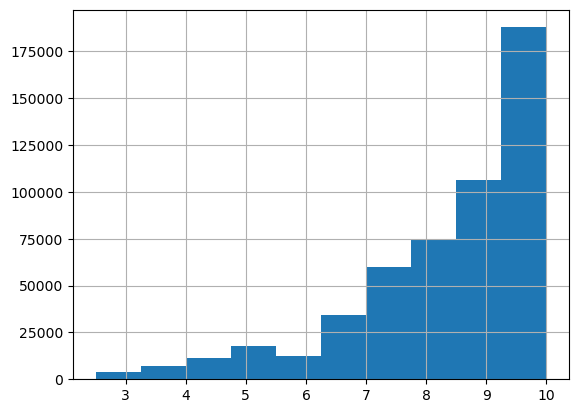

In [9]:
# Histogram showing the distribution of the review scores 
df['Reviewer_Score'].hist(bins=10)

In [10]:
# Show the distribution of the review scores in bins
print(df['Reviewer_Score'].value_counts(bins=10))

(9.25, 10.0]     187807
(8.5, 9.25]      105659
(7.75, 8.5]       75277
(7.0, 7.75]       59733
(6.25, 7.0]       34502
(4.75, 5.5]       18175
(5.5, 6.25]       12304
(4.0, 4.75]       11469
(3.25, 4.0]        6979
(2.491, 3.25]      3833
Name: count, dtype: int64


- Histogram: shows what we already know from statistical summary. The dataset is heavily imbalanced. 

After understanding some basic information about the dataset, we move on to preprocessing the data.

## <a id='toc1_5_'></a>[**Cleaning review texts and finding threshold**](#toc0_)

- "Negative_Review" and "Positive_Review" contain the review text.
- Many entries use placeholders like "No Negative" or "No Positive".
- These are irrelevant for sentiment analysis.
- They will be replaced with empty strings to avoid misleading the model.
- This cleans the data for merging both reviews into one field.

#### <a id='toc1_5_1_1_'></a>[**Attempt to find a limit for positive and negative reviews**](#toc0_)
- Before removing placeholders, we analyze them for insights.
- Specifically, we examine review score distributions where "No Positive" or "No Negative" appears.
- The goal is to help identify a score threshold that separates positive and negative sentiment.

In [13]:
# Here we check the mean and median scores of reviews that are blank, e.g. they contain both strings "No Negative" and "No Positive" in the columns "Negative_Review" and "Positive_Review" respectively.
none_mean = df[(df['Negative_Review'] == 'No Negative') & (df['Positive_Review'] == 'No Positive')]['Reviewer_Score'].mean()
none_median = df[(df['Negative_Review'] == 'No Negative') & (df['Positive_Review'] == 'No Positive')]['Reviewer_Score'].median()

# We also see how many reviews are blank 
amount_none = df[(df['Negative_Review'] == 'No Negative') & (df['Positive_Review'] == 'No Positive')].shape[0]

# Here we check the mean and median scores of reviews that are positive, i.e. they contain the string "No Negative" in the column "Negative_Review" and do not contain the string "No Positive" in the column "Positive_Review".
positive_mean = df[(df['Negative_Review'] == 'No Negative') & (df['Positive_Review'] != 'No Positive')]['Reviewer_Score'].mean()
positive_median = df[(df['Negative_Review'] == 'No Negative') & (df['Positive_Review'] != 'No Positive')]['Reviewer_Score'].median()

# Here we check the mean and median scores of reviews that are negative, i.e. they contain the string "No Positive" in the column "Positive_Review" and do not contain the string "No Negative" in the column "Negative_Review".
negative_mean = df[(df['Negative_Review'] != 'No Negative') & (df['Positive_Review'] == 'No Positive')]['Reviewer_Score'].mean()
negative_median = df[(df['Negative_Review'] != 'No Negative') & (df['Positive_Review'] == 'No Positive')]['Reviewer_Score'].median()

print('Mean of no negative and no positive (blank reviews):', none_mean)
print('Median of no negative and no positive (blank reviews):', none_median)
print('Amount of reviews with no negative and no positive (blank reviews):', amount_none)
print()
print('Mean of positive reviews:', positive_mean)
print('Median of positive reviews:', positive_median)
print()
print('Mean of negative reviews:', negative_mean)
print('Median of negative reviews:', negative_median)

Mean of no negative and no positive (blank reviews): 8.285826771653543
Median of no negative and no positive (blank reviews): 8.8
Amount of reviews with no negative and no positive (blank reviews): 127

Mean of positive reviews: 9.339492654367852
Median of positive reviews: 9.6

Mean of negative reviews: 6.881705240235629
Median of negative reviews: 7.1


In [12]:
# Here we calculate the percentage of reviews that contain 'No Negative' in the 'Negative_Review' column and 'No Positive' in the 'Positive_Review' column
def percentage_of_reviews():
    no_negative = df[df['Negative_Review'] == 'No Negative'].shape[0]
    no_positive = df[df['Positive_Review'] == 'No Positive'].shape[0]
    total = df.shape[0]

    positive_percentage = no_negative / total * 100
    negative_percentage = no_positive / total * 100

    print('Percentage of clearly positive reviews:', positive_percentage)
    print('Percentage of clearly negative reviews:', negative_percentage)

percentage_of_reviews()

Percentage of clearly positive reviews: 24.797474686759557
Percentage of clearly negative reviews: 6.96981800836859


- 127 reviews only have "No Negative" and "No Positive" → essentially empty:
    - Mean ≈ 8.3, Median = 8.8 → strongly positive
    - Removed later as they're not useful for sentiment analysis
- 24.7% contain "No Negative":
    - Mean ≈ 9.3, Median = 9.6 → very positive
- 7% contain "No Positive":
    - Mean ≈ 6.9, Median = 7.1 → lower sentiment
- Insight: A sentiment threshold around 7 may be appropriate

We can plot the relationship between score and word count of each sentiment, to further investigate a potential threshold for separating the reviews.

/var/folders/gk/fhc5s9xs7pzck55c8_420hg40000gn/T/ipykernel_78061/1613613854.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby('bin').agg(
/var/folders/gk/fhc5s9xs7pzck55c8_420hg40000gn/T/ipykernel_78061/1613613854.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby('bin').agg(


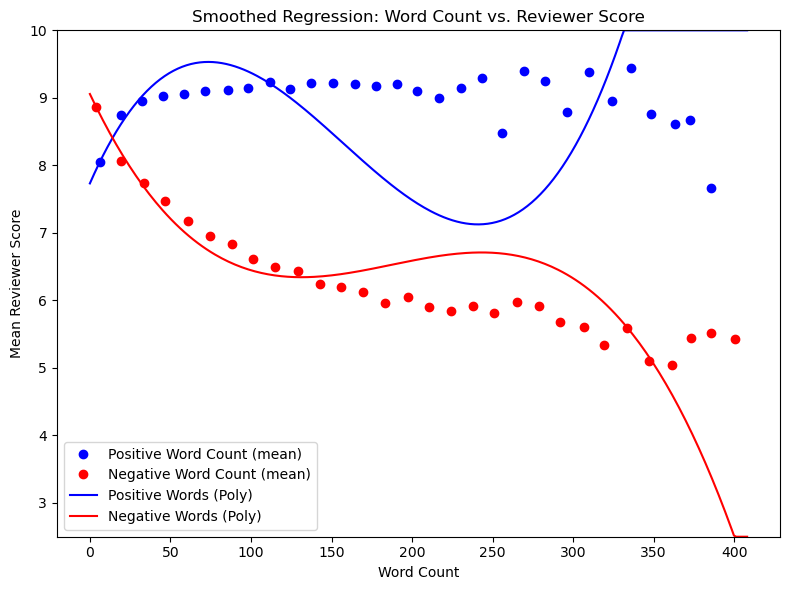

Intersection point: x = 14.10, y = 8.41


In [ ]:
## The following code has been adapted from a prompt to OpenAI's ChatGPT 

def compute_means(df, col, bins=30):
    """Bins data and computes the mean Reviewer Score per bin."""
    df['bin'] = pd.cut(df[col], bins=bins)
    grouped = df.groupby('bin').agg(
        mean_count=(col, 'mean'),
        mean_score=('Reviewer_Score', 'mean')
    ).dropna()
    return grouped[['mean_count', 'mean_score']]

def find_intersection_non_linear(df, degree=2):
    """Find intersection point of two polynomial regression curves."""
    X_pos = df[['pos_count']].values
    X_neg = df[['neg_count']].values
    y = df['Reviewer_Score'].values

    poly = PolynomialFeatures(degree)
    X_pos_poly = poly.fit_transform(X_pos)
    X_neg_poly = poly.fit_transform(X_neg)

    model_pos = LinearRegression().fit(X_pos_poly, y)
    model_neg = LinearRegression().fit(X_neg_poly, y)

    # Coefficients
    coeffs_pos = model_pos.coef_
    coeffs_neg = model_neg.coef_

    # Solve: a1*x^2 + b1*x + c1 = a2*x^2 + b2*x + c2
    a = coeffs_pos[2] - coeffs_neg[2]
    b = coeffs_pos[1] - coeffs_neg[1]
    c = model_pos.intercept_ - model_neg.intercept_

    discriminant = b**2 - 4*a*c

    if discriminant >= 0:
        x1 = (-b + np.sqrt(discriminant)) / (2*a)
        x2 = (-b - np.sqrt(discriminant)) / (2*a)
        x_int = x1 if x1 >= 0 else x2
        y_int = model_pos.predict(poly.transform([[x_int]]))[0]
        return x_int, y_int
    else:
        return None

def plot_sentiment_vs_score_clean(df, degree=2, bins=30):
    """Clean smoothed plots with means and polynomial regression curves, clipped to [2.5, 10]."""
    df[['pos_count', 'neg_count']] = df[['Review_Total_Positive_Word_Counts', 'Review_Total_Negative_Word_Counts']]

    pos_means = compute_means(df, 'pos_count', bins)
    neg_means = compute_means(df, 'neg_count', bins)

    poly = PolynomialFeatures(degree)

    X_pos = df[['pos_count']].values
    X_neg = df[['neg_count']].values
    y = df['Reviewer_Score'].values

    X_pos_poly = poly.fit_transform(X_pos)
    X_neg_poly = poly.fit_transform(X_neg)

    model_pos = LinearRegression().fit(X_pos_poly, y)
    model_neg = LinearRegression().fit(X_neg_poly, y)

    x_range = np.linspace(0, max(df[['pos_count', 'neg_count']].max()), 300).reshape(-1, 1)
    y_pos_pred = model_pos.predict(poly.transform(x_range))
    y_neg_pred = model_neg.predict(poly.transform(x_range))

    # Clip predictions between 2.5 and 10
    y_pos_pred = np.clip(y_pos_pred, 2.5, 10)
    y_neg_pred = np.clip(y_neg_pred, 2.5, 10)

    plt.figure(figsize=(8, 6))

    # Smoothed mean points
    plt.plot(pos_means['mean_count'], pos_means['mean_score'], 'o', color='blue', label='Positive Word Count (mean)')
    plt.plot(neg_means['mean_count'], neg_means['mean_score'], 'o', color='red', label='Negative Word Count (mean)')

    # Fitted regression curves
    plt.plot(x_range, y_pos_pred, color='blue', label="Positive Words (Poly)")
    plt.plot(x_range, y_neg_pred, color='red', label="Negative Words (Poly)")

    plt.title("Smoothed Regression: Word Count vs. Reviewer Score")
    plt.xlabel("Word Count")
    plt.ylabel("Mean Reviewer Score")
    plt.ylim(2.5, 10)  # Lock y-axis range
    plt.legend()
    plt.tight_layout()
    plt.show()

    # Print intersection info separately
    intersection = find_intersection_non_linear(df, degree)
    if intersection:
        x_int, y_int = intersection
        print(f"Intersection point: x = {x_int:.2f}, y = {y_int:.2f}")
    else:
        print("No intersection point found.")

plot_sentiment_vs_score_clean(df, degree=3, bins=30)

**General trend:**
- More positive words -> Steady increase in score.
- More negative words -> Steeper reduction in score.
- Negative word count has larger impact on score than positive word count -> negativity bias
- Intersection point at 8.4.

Let's see how distribution of reviews would look like with split at 8,4.

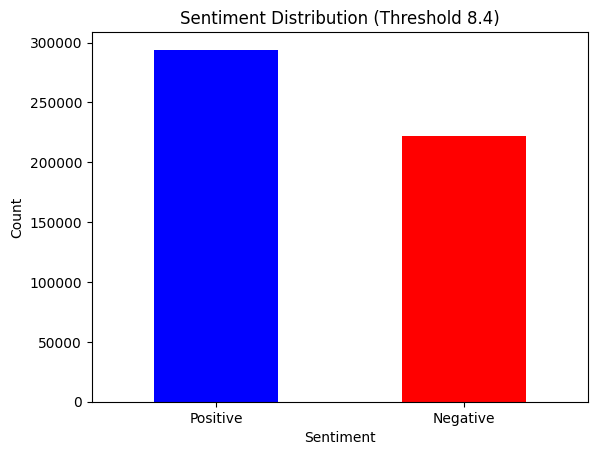

In [20]:
df_copy['Sentiment'] = df_copy['Reviewer_Score'].apply(lambda x: 'Positive' if x > 8.4 else 'Negative')

df_copy['Sentiment'].value_counts().plot(kind='bar', color=['blue', 'red'])
plt.title('Sentiment Distribution (Threshold 8.4)')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

Let's see distribution at 7.1 (median of reviews with "No Positive").

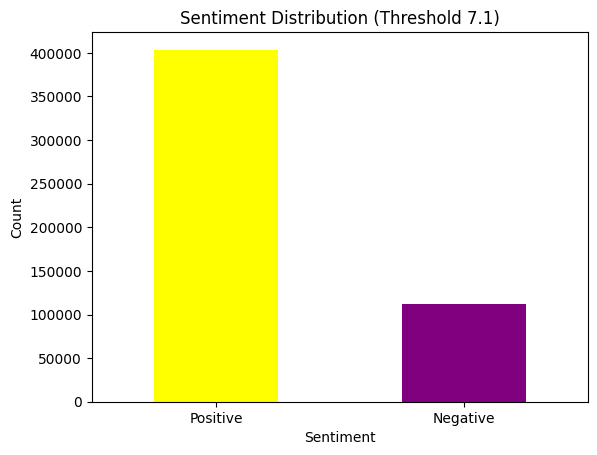

In [21]:
df_copy['Sentiment'] = df_copy['Reviewer_Score'].apply(lambda x: 'Positive' if x > 7.1 else 'Negative')

df_copy['Sentiment'].value_counts().plot(kind='bar', color=['yellow', 'purple'])
plt.title('Sentiment Distribution (Threshold 7.1)')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

- Takeaways:
    - 8.4 → Balanced but unrealistic for negative scores below this.
    - 7.1 → Highly imbalanced distribution.
    - 7.1 fits expectations but has low negative count, hurting training.
    - 7.8 → Reasonable compromise threshold.

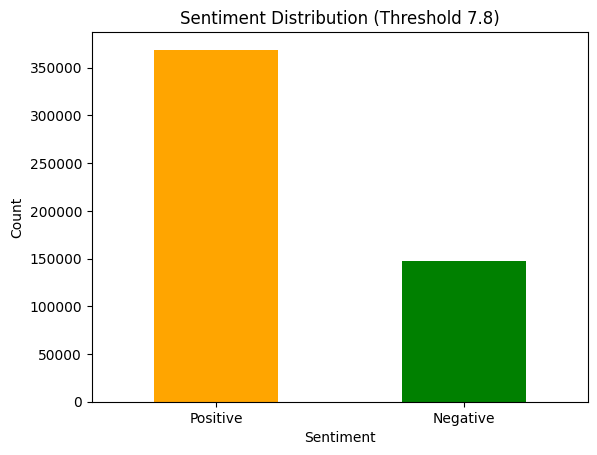

In [22]:
df_copy['Sentiment'] = df_copy['Reviewer_Score'].apply(lambda x: 'Positive' if x > 7.8 else 'Negative')

df_copy['Sentiment'].value_counts().plot(kind='bar', color=['orange', 'green'])
plt.title('Sentiment Distribution (Threshold 7.8)')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

Increase of almost 50,000 negatives. Should be a good enough threshold.

#### <a id='toc1_5_1_2_'></a>[**Cleaning blank review columns**](#toc0_)

We remove the previously discussed blank reviews.

In [21]:
# Count how many reviews contain the strings "No Negative" and "No Positive" in the columns "Negative_Review" and "Positive_Review" respectively
def count_reviews_with_sentiment_in_text():
    no_negative = 0
    no_positive = 0
    for review in df['Negative_Review']:
        if "No Negative" in review and review != 'No Negative':
            no_negative += 1

    for review in df['Positive_Review']:
        if "No Positive" in review and review != 'No Positive':
                no_positive += 1

    return no_negative, no_positive

print("Reviews containing either 'No Negative' or 'No Positive' in the review itself:")
print(count_reviews_with_sentiment_in_text())

print("Removing reviews with only 'No Negative' and 'No Positive' placeholders ('blank reviews'):")

df['Negative_Review'] = df['Negative_Review'].apply(lambda x: x if x != 'No Negative' else '')
df['Positive_Review'] = df['Positive_Review'].apply(lambda x: x if x != 'No Positive' else '')

# Confirm that the replacements were successful and did not remove occurences of the strings "No Negative" and "No Positive" in ordinary reviews
print(count_reviews_with_sentiment_in_text())
percentage_of_reviews()

df = df[(df['Negative_Review'] != '') | (df['Positive_Review'] != '')]

Reviews containing either 'No Negative' or 'No Positive' in the review itself:
(3, 0)
Removing reviews with only 'No Negative' and 'No Positive' placeholders ('blank reviews'):
(3, 0)
Percentage of clearly positive reviews: 0.0
Percentage of clearly negative reviews: 0.0


- We replace the columns that ONLY contain the placeholders with blank space.
- We check that this operation is successful by checking previously printed percentages. 
- We check the reviews containing "No Negative" in the text.

In [24]:
print("The three reviews containing 'No Negative' and their rating:")
for review in df['Negative_Review']:
    if "No Negative" in review and review != 'No Negative':
        print(review + str(df[df['Negative_Review'] == review]['Reviewer_Score'].values[0]))

The three reviews containing 'No Negative' and their rating:
 No Negative Points Everything great 9.6
 No Negative comments only that we wish we could have stayed there longer And giving it a 10 rating is selling the hotel short in my eyes 10.0
 No Negatives from us only Thumbs Up 10.0


- Extremely positive reviews.
- No need to do anything.

We move on to adressing reviews containing foreign language.

## <a id='toc1_6_'></a>[**Exploring reviews written in foreign languages**](#toc0_)

Some of the reviews are written in or contain foreign languages. 
This will be a problem for our models as we base them on the English language, and adressing this may help their performance.

In [ ]:
# We combine the review text columns in the copy of the dataset for easier visualization 
df_copy['Review'] = df_copy['Negative_Review'] + ' ' + df_copy['Positive_Review']

In [26]:
# Here we check the distribution of reviewer nationality.
df_copy['Reviewer_Nationality'].describe()

count               515738
unique                 227
top        United Kingdom 
freq                245246
Name: Reviewer_Nationality, dtype: object

In [27]:
# We then check the top 10 reviewer nationalities. 
print(df_copy['Reviewer_Nationality'].value_counts().head(10))

Reviewer_Nationality
United Kingdom               245246
United States of America      35437
Australia                     21686
Ireland                       14827
United Arab Emirates          10235
Saudi Arabia                   8951
Netherlands                    8772
Switzerland                    8678
Germany                        7941
Canada                         7894
Name: count, dtype: int64


In [28]:
# Furthermore, we decide to check if any reviews contain non-latin alphabet characters.  
def check_non_latin_letters(dataframe):
    count = 0
    for review in dataframe['Review']:
        if review is not None: 
            matches = re.findall(r'[^\x00-\x7F\d\W_]', review)
            for match in matches:
                count += 1
    return count

print("Number of reviews with non-latin alphabetic characters:", check_non_latin_letters(df_copy))

Number of reviews with non-latin alphabetic characters: 0


**Insights:**
- No reviews contain non-latin alphabetic characters.
- The top nationalities almost exclusively use latin alphabet in their official language, exceptions being Saudi Arabia and United Arab Emirates. 
- Therefore, we assume reviews from arabic countries are in English, and inspection of their reviews seem to confirm this.
- No action needed

The initial cause for this inquiry into foreign language reviews was caused by reviews written in swedish. Let's explore them: 

In [29]:
print("Swedish reviews count:")
print(df_copy['Reviewer_Nationality'].value_counts()[' Sweden '])

Swedish reviews count:
3368


In [ ]:
print("Several examples of Swedish reviews:")
print('1.' + df_copy.loc[224965, 'Review'] + '\n')
print('2.' + df_copy.loc[102335, 'Review'] + '\n')
print('3.' + df_copy.loc[514238, 'Review'] + '\n')
print('4.' + df_copy.loc[44876, 'Review'] + '\n')
print('5.' + df_copy.loc[381438, 'Review'] + '\n')

Several examples of Swedish reviews:
1. Rummet var litet Toalett utan handfat Tr ngt badrum D lig frukost utan gr nsaker Liten pool i ett annat hus S sm f rvaringssk p   Bra l ge N ra till Eiffeltornet floden och nya k pcentrum 

2. H rd s ng var enda minus under vistelsen   Utm rkt l ge p hotellet Kort g avst nd fr n tinnelbanan och bussen alldeles utanf r d rren Ett extra plus var att en buss gick direkt till westfield gallerian med shopping i m ngder 

3. Sv rt att f rst och g ra sig f rst dd hos personalen vars engelska ibland var v ldigt bristf llig   J ttegod frukost med stort utbud 

4. S ngarna var f r h rda i min smak Omgivningarna best r av nyare byggnader med m nga kontorshus s det r inte s charmig del av London   Trevlig v lst dat rum i engelsk stil Fint badrum Ett plus att man dagligen fick tv l och tv vatten i kylsk pet gratis Mycket positiv och trevlig personal i matsalen Frukosten var bra eftersom man fick v lja ett varmt alternativ fr n menyn annars hade det blivit lit

- Clearly these reviews are nonsense for our models.

In [31]:
swedish_reviews = df_copy[df_copy['Reviewer_Nationality'] == ' Sweden ']
total_negative_words = swedish_reviews['Review_Total_Negative_Word_Counts'].sum()
total_positive_words = swedish_reviews['Review_Total_Positive_Word_Counts'].sum()

print('Total number of negative words in Swedish reviews:', total_negative_words)
print('Total number of positive words in Swedish reviews:', total_positive_words)

Total number of negative words in Swedish reviews: 72640
Total number of positive words in Swedish reviews: 64246


- Ratio of positive to negative words in the Swedish reviews is almost equal.
- We remove Swedish reviews - solves problem - not huge loss of data.

In [ ]:
# Exclude Swedish reviews from the dataset
df = df[df['Reviewer_Nationality'] != ' Sweden ']

We decide to not explore reviews written by other foreign languages, as results are minimal compared to time spent and by the fact that the majority of the reviews are written by english speakers. We acknowledge however, that cleaning the dataset to only contain reviews written in English would be ideal. 

## <a id='toc1_7_'></a>[**Transforming review scores to binary values**](#toc0_)

We add a new column: 'Sentiment' which is 0 (representing negative reviews) if reviewer score is less than or equal to 7,8 and 1 (positive) if score is greater than 7,8.

In [ ]:
df['Sentiment'] = df['Reviewer_Score'].apply(lambda x: 1 if x > 7.8 else 0)

print(df['Sentiment'].value_counts())
print(df['Sentiment'].value_counts(normalize=True) * 100)

Sentiment
1    366397
0    145846
Name: count, dtype: int64
Sentiment
1    71.527966
0    28.472034
Name: proportion, dtype: float64


- The results above again reflect that the dataset is imbalanced: ≈70% of reviews being positive. 
- We keep the original dataset as it is to reflect a real-world distribution, where most reviews are usually positive.
- Balancing the classes (e.g., oversampling negatives) can help detect minority cases but risks introducing artificial patterns.
- Such changes may reduce real-world generalizability.
- The trade-off: models may lean towards predicting positive reviews more often.

## <a id='toc1_8_'></a>[**Preprocessing the review text**](#toc0_)

### <a id='toc1_8_1_'></a>[**Stopwords removal**](#toc0_)

In [34]:
stop = stopwords.words('english')

def most_common_words(text):
    words = dict()
    for word in text:
        for w in word.split():
            if w in words and w != '':
                words[w] += 1
            else:
                words[w] = 1
    words = dict(sorted(words.items(), key=lambda item: item[1], reverse=True))
    return list(words.keys())[:10]

most_common_positive = most_common_words(df['Positive_Review'])
most_common_negative = most_common_words(df['Negative_Review'])

print('Most common words in positive reviews:')
print(most_common_positive)
print('\n')
print('Most common words in negative reviews:')
print(most_common_negative)

Most common words in positive reviews:
['and', 'the', 'was', 'to', 'The', 'a', 'staff', 'very', 'location', 'room']


Most common words in negative reviews:
['the', 'was', 'to', 'a', 'and', 'in', 'room', 'of', 'for', 'not']


The most common words in both positive and negative reviews are stopwords. 
We will remove the stopwords from the reviews by using NLTK library, making sure to keep the words "no" and "not" as they are important for sentiment analysis as negation words.

In [36]:
stopwords_removed = dict()

def remove_stopwords_and_count(text):
    cleaned_text = ' '.join([word for word in text.split() if word.lower() not in stop or word.lower() in ['no', 'not']])
    for word in text.split():
        if word.lower() in stop and word.lower() not in ['no', 'not']:
            if word.lower() in stopwords_removed:
                stopwords_removed[word.lower()] += 1
            else:
                stopwords_removed[word.lower()] = 1
    return cleaned_text

df['positive_review_cleaned'] = df['Positive_Review'].apply(lambda x: remove_stopwords_and_count(x))
df['negative_review_cleaned'] = df['Negative_Review'].apply(lambda x: remove_stopwords_and_count(x))

most_common_positive_cleaned = most_common_words(df['positive_review_cleaned'])
most_common_negative_cleaned = most_common_words(df['negative_review_cleaned'])

print('Most common words in positive reviews after removing stopwords:')
print(most_common_positive_cleaned)
print('\n')
print('Most common words in negative reviews after removing stopwords:')
print(most_common_negative_cleaned)

Most common words in positive reviews after removing stopwords:
['staff', 'location', 'room', 'hotel', 'good', 'helpful', 'friendly', 'great', 'breakfast', 'clean']


Most common words in negative reviews after removing stopwords:
['room', 'not', 'hotel', 'small', 'no', 'breakfast', 'staff', 'could', 'would', 'Nothing']


Observation: "could" and "would" carry little semantic meaning and we remove them as well.

In [37]:
def remove_specific_words(text, words):
    for word in words:
        text = text.replace(word, '')
    return text

df['positive_review_cleaned'] = df['positive_review_cleaned'].apply(lambda x: remove_specific_words(x, ['could', 'would']))
df['negative_review_cleaned'] = df['negative_review_cleaned'].apply(lambda x: remove_specific_words(x, ['could', 'would']))

most_common_positive_cleaned = most_common_words(df['positive_review_cleaned'])
most_common_negative_cleaned = most_common_words(df['negative_review_cleaned'])

print('Most common words in positive reviews after removing stopwords and specific words:')
print(most_common_positive_cleaned)
print('\n')
print('Most common words in negative reviews after removing stopwords and specific words:')
print(most_common_negative_cleaned)

Most common words in positive reviews after removing stopwords and specific words:
['staff', 'location', 'room', 'hotel', 'good', 'helpful', 'friendly', 'great', 'breakfast', 'clean']


Most common words in negative reviews after removing stopwords and specific words:
['room', 'not', 'hotel', 'small', 'no', 'breakfast', 'staff', 'Nothing', 'rooms', 'bit']


- "Nothing" frequently appears alone in negative reviews, meaning the reviewer had no complaints.
- Instead of using the placeholder "No Negative", some reviewers explicitly wrote "Nothing".
- This creates a challenge, since "Nothing" is a common word used in many contexts, making it hard to reliably detect and remove without affecting legitimate content.

In [38]:
no_negative = df[df['Negative_Review'].apply(lambda x: x.lower().strip() in ['no', 'nothing', 'none'])].shape[0]
no_positive = df[df['Positive_Review'].apply(lambda x: x.lower().strip() in ['no', 'nothing', 'none'])].shape[0]

print('Number of reviews with only the word "no", "nothing" or "none" in the Negative_Review column:', no_negative)
print('Number of reviews with only the word "no", "nothing" or "none" in the Positive_Review column:', no_positive)

Number of reviews with only the word "no", "nothing" or "none" in the Negative_Review column: 22827
Number of reviews with only the word "no", "nothing" or "none" in the Positive_Review column: 1802


We remove reviews only containing either "Nothing", "No" or "None".

In [39]:
df['Negative_Review'] = df['Negative_Review'].apply(
    lambda x: '' if re.fullmatch(r'\b(nothing|no|none)\b', x, flags=re.IGNORECASE) else x
)
df['Positive_Review'] = df['Positive_Review'].apply(
    lambda x: '' if re.fullmatch(r'\b(nothing|no|none)\b', x, flags=re.IGNORECASE) else x
)

We make sure that no completely blank reviews have appeared.

In [40]:
empty_reviews = df[(df['Negative_Review'] == '') & (df['Positive_Review'] == '')].shape[0]

print('Number of rows where both the Negative_Review and Positive_Review columns are empty:', empty_reviews)

Number of rows where both the Negative_Review and Positive_Review columns are empty: 0


In [ ]:
print("Total of unique stopwords removed:", len(stopwords_removed))
print("Most common stopwords removed:", sorted(stopwords_removed.items(), key=lambda x: x[1], reverse=True)[:10])
print("Total amount stopwords removed:", sum(stopwords_removed.values()))
print("Average number of stopwords removed per review:", sum(stopwords_removed.values()) / len(df))

Total of unique stopwords removed: 151
Most common stopwords removed: [('the', 1038469), ('and', 635457), ('was', 470590), ('to', 413738), ('a', 392172), ('in', 279723), ('very', 271513), ('of', 226058), ('for', 207368), ('is', 183249)]
Total amount stopwords removed: 7531122


In [42]:
print("Number of rows in the dataset")
print(df.shape[0]) 

Number of rows in the dataset
512243


On average, approximately 15 stopwords were removed from each row. Removing these stopwords is crucial, as it allows the models to focus on words more likely to carry sentiment.

### <a id='toc1_8_2_'></a>[**Combining and Cleaning the review texts**](#toc0_)

Further cleaning of reviews: remove special characters, punctuation and lowercasing. 
To do this, we combine the positive and negative reviews into one column called "Review".

In [ ]:
df['Review'] = df['Negative_Review'] + ' ' + df['Positive_Review']

def preprocess_text(cleaned_text):
    cleaned_text = cleaned_text.lower().strip() 
    cleaned_text = re.sub(f"[{string.punctuation}]", "", cleaned_text)
    return cleaned_text

df['Review'] = df['Review'].apply(preprocess_text)
df[['Review']].head()

,Review
0,i am so angry that i made this post available ...
1,no real complaints the hotel was great great l...
2,rooms are nice but for elderly a bit difficult...
3,my room was dirty and i was afraid to walk bar...
4,you when i booked with your company on line yo...


### <a id='toc1_8_3_'></a>[**Converting numbers to words**](#toc0_)

* Numbers are difficult for our models to interpret - We convert numbers to words to preserve sentiment

In [ ]:
# First we get an overview of the numbers that we need to account for.
def extract_numbers(text):
    return [(num) for num in re.findall(r'-?\d+\.?\d*', text)]

# Apply function to extract numbers
df['Numbers'] = df['Review'].apply(extract_numbers)

# Flatten list and find the biggest numbers
all_numbers = [num for sublist in df['Numbers'] for num in sublist]
top_numbers = sorted(all_numbers, reverse=True, key=lambda x : float(x))  # Get top 5 biggest numbers

print("Top numbers found:", top_numbers[:5])

Top numbers found: ['0033668738787', '07828064307', '950749093', '505945518', '13789540']


After looking at these reviews we can see that the biggest numbers most likely are phone- and card numbers, which are not useful.

In [45]:
print("Example of a review before replacing numbers with placeholders:")
print(df_copy.loc[5512, 'Review'])

def convert_numbers(text):
    text = re.sub(r'\b[1-5]\b', 'NUM_LOW', text)
    text = re.sub(r'\b-?\d{3,}(?:\.\d+)?\b', 'NUM', text)
    text = re.sub(r'\b[6-9]|10|\d{2}\b', 'NUM_HIGH', text)

    return text

df['Review'] = df['Review'].apply(convert_numbers)
print("\nExample of the same review after replacing numbers with placeholders:")
df.loc[5512, 'Review']

Example of a review before replacing numbers with placeholders:
No Negative  I would not normally Mark somewhere 10 out of 10 but as soon as we got there the staff were friendly and helpful the room was excellent There was a nice seating area outside where the wife could have a smoke while we had a drink When we went out in the evening there was a good selection of bars and restaurants within a short walking distance In the morning there was a good selection for breakfast we both had a full English breakfast which was cooked to perfection 

Example of the same review after replacing numbers with placeholders:


'i would not normally mark somewhere NUM_HIGH out of NUM_HIGH but as soon as we got there the staff were friendly and helpful the room was excellent there was a nice seating area outside where the wife could have a smoke while we had a drink when we went out in the evening there was a good selection of bars and restaurants within a short walking distance in the morning there was a good selection for breakfast we both had a full english breakfast which was cooked to perfection'

- Numbers in reviews (e.g., “x out of x”) often reflect hotel quality and impact sentiment.
- To preserve this sentiment signal, numeric values are replaced with placeholders:
    - 1–5 → NUM_LOW.
    - 6–9 and all 2-digit numbers → NUM_HIGH.
    - Numbers >100 → NUM (assumed sentimentally irrelevant beyond this threshold).

In [46]:
print("Example of a review before replacing numbers with placeholders:")
print(df_copy.loc[11, 'Review'])

print("\nExample of the same review after replacing numbers with placeholders:")
df.loc[11, 'Review'] 

Example of a review before replacing numbers with placeholders:
 6 30 AM started big noise workers loading wood down the windows Stupid room numbering system it took 20 Minutes with a night guard finally to find our rooms The check in staff pointed us in the wrong direction No late dinner bar closes at 1 am Ugly view on trash lorry from windows No information about the computerized telephone Huge price difference between booking Com price 166 euros and hotel price 260   Style location rooms

Example of the same review after replacing numbers with placeholders:


'NUM_HIGH NUM_HIGH am started big noise workers loading wood down the windows stupid room numbering system it took NUM_HIGH minutes with a night guard finally to find our rooms the check in staff pointed us in the wrong direction no late dinner bar closes at NUM_LOW am ugly view on trash lorry from windows no information about the computerized telephone huge price difference between booking com price NUM euros and hotel price NUM   style location rooms'

- Example showing our solution is not perfect -> time stamps make no sense.
- Context doesn't always carry over -> "5 stars" becomes "NUM_LOW stars", which is misleading.
- Our solution makes some sentences misleading: "Coffee was cheap, it only cost 15 NOK" becomes "NUM_HIGH NOK".
- We decide this is the best solution for now.

### <a id='toc1_8_4_'></a>[**Tokenization**](#toc0_)

In [ ]:
# Tokenization is done on the review text to prepare it for lemmatization.
def tokenize(text):
    return word_tokenize(text)

df['tokens'] = df['Review'].apply(tokenize)
df[['tokens']].head() 

,tokens
0,"[i, am, so, angry, that, i, made, this, post, ..."
1,"[no, real, complaints, the, hotel, was, great,..."
2,"[rooms, are, nice, but, for, elderly, a, bit, ..."
3,"[my, room, was, dirty, and, i, was, afraid, to..."
4,"[you, when, i, booked, with, your, company, on..."


### <a id='toc1_8_5_'></a>[**Lemmatization**](#toc0_)

We do lemmatization on the tokenized text: reducing words to their base or root form - removing grammatical variations of words - now the models can focus on the core meaning of the words.

In [ ]:
# Function to map NLTK POS tags to WordNet's format
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN # Default is noun

lemmatizer = WordNetLemmatizer()

def lemmatize(tokens):
    tagged_tokens = pos_tag(tokens) # Get POS tags
    lemmatized_tokens = []
    for token, pos in tagged_tokens:
        wordnet_pos = get_wordnet_pos(pos) # Convert POS tag to WordNet format
        lemmatized_token = lemmatizer.lemmatize(token, wordnet_pos) # Lemmatize
        lemmatized_tokens.append(lemmatized_token)
    
    return lemmatized_tokens

df['lemmatized'] = df['tokens'].apply(lemmatize)

df[['lemmatized']].head() 

,lemmatized
0,"[i, be, so, angry, that, i, make, this, post, ..."
1,"[no, real, complaint, the, hotel, be, great, g..."
2,"[room, be, nice, but, for, elderly, a, bit, di..."
3,"[my, room, be, dirty, and, i, be, afraid, to, ..."
4,"[you, when, i, book, with, your, company, on, ..."


## <a id='toc1_9_'></a>[**Splitting the data**](#toc0_)

- Data is split into training (70%) and testing (30%) sets.
- Features: lemmatized reviews clomun, Target: Sentiment column.
- A 70/30 split balances training and evaluation needs.
- Using 70% (vs. 80%) reduces computational cost while retaining enough test data for evaluation.

In [ ]:
X = df['lemmatized'].apply(lambda x: ' '.join(x))
y = df['Sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

X_train = X_train.to_numpy()
y_train = y_train.to_numpy()

df[['lemmatized', 'Sentiment']].head() 

,lemmatized,Sentiment
0,"[i, be, so, angry, that, i, make, this, post, ...",0
1,"[no, real, complaint, the, hotel, be, great, g...",0
2,"[room, be, nice, but, for, elderly, a, bit, di...",0
3,"[my, room, be, dirty, and, i, be, afraid, to, ...",0
4,"[you, when, i, book, with, your, company, on, ...",0


## <a id='toc1_10_'></a>[**MultinomialNB Model**](#toc0_)

MultinomialNB - chosen because it is simple, fast and often used for classification.

### <a id='toc1_10_1_'></a>[**Model building**](#toc0_)

- Pipeline: Streamlines text processing and model training; prevents data leakage by applying steps only to training data.
- TF-IDF Vectorizer (text to numeric):
    - min_df=5: Removes rare words.
    - max_df=0.8: Excludes overly common words.
    - norm='l2': Normalizes vectors to reduce review length bias.
- GridSearchCV: Tunes hyperparameters to find the best model.
    - alpha: Controls smoothing to handle rare words.
    - ngram_range: Tests uni-, bi-, or tri-grams for feature usefulness.
- 5-fold Stratified CV: Maintains class balance in each fold — essential for imbalanced data.
- Scoring Metric: F1 Score - balances precision and recall, ideal for skewed datasets.

In [ ]:
if os.path.exists('grid_mnb.pkl'):
    grid_mnb = joblib.load('grid_mnb.pkl')
else:
    pipe_mnb = make_pipeline(TfidfVectorizer(min_df = 5, max_df=0.8, norm='l2'), MultinomialNB())
    param_grid_mnb = {'multinomialnb__alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'tfidfvectorizer__ngram_range': [(1, 1), (1, 2), (1, 3)]}
    kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    grid_mnb = GridSearchCV(pipe_mnb, param_grid_mnb, cv=kfold, scoring='f1', refit=True, n_jobs=-1, return_train_score=True)
    grid_mnb.fit(X_train, y_train)

print("Best parameters: {}".format(grid_mnb.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_mnb.best_score_))
print("Best estimator: {}".format(grid_mnb.best_estimator_))

Best parameters: {'multinomialnb__alpha': 1, 'tfidfvectorizer__ngram_range': (1, 3)}
Best cross-validation score: 0.88
Best estimator: Pipeline(steps=[('tfidfvectorizer',
                 TfidfVectorizer(max_df=0.8, min_df=5, ngram_range=(1, 3))),
                ('multinomialnb', MultinomialNB(alpha=1))])


### <a id='toc1_10_2_'></a>[**Heatmaps**](#toc0_)

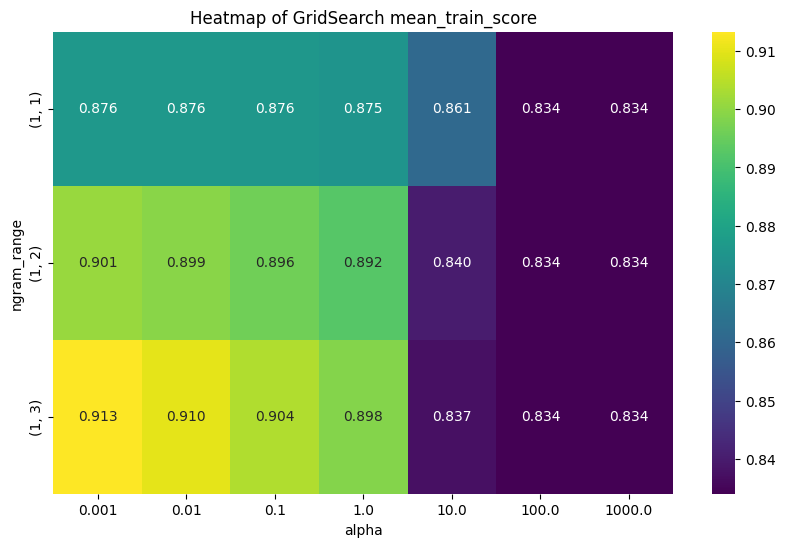

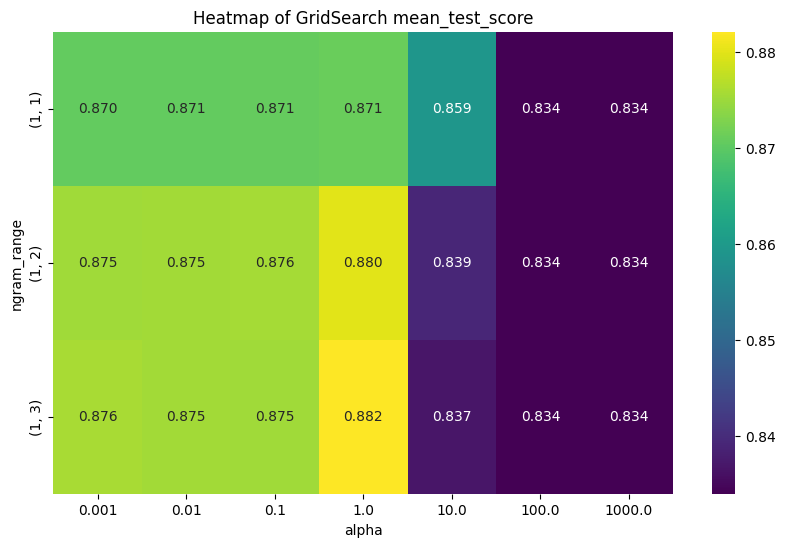

In [ ]:
# Heat maps of mean cross-validation f1 score as a function of the parameters ngram_range and alpha
plot_gridsearch_heatmap(grid_mnb, 
                        x_param='multinomialnb__alpha', 
                        y_param='tfidfvectorizer__ngram_range', score_metric='mean_train_score')

plot_gridsearch_heatmap(grid_mnb,
                        x_param='multinomialnb__alpha', 
                        y_param='tfidfvectorizer__ngram_range', score_metric='mean_test_score')

- Best Performance: Achieved with alpha=1 and ngram_range=(1,3) — including trigrams adds value.
- Stable Across Alphas: (1,1) and (1,2) n-grams perform reliably, especially at lower alpha values.
- Low Alpha Values: Improve learning by reducing smoothing, allowing the model to better capture word patterns.
- High Alpha Values: Degrade performance — too much smoothing leads to loss of important distinctions.
- N-gram Impact: All ranges perform similarly, but (1,3) slightly outperforms others — suggesting trigrams help, but bigrams and unigrams alone may be sufficient.

### <a id='toc1_10_3_'></a>[**Predicting sentiment and evaluating the model**](#toc0_)

In [ ]:
y_pred_mnb = grid_mnb.predict(X_test)

#### <a id='toc1_10_3_1_'></a>[**Confusion matrix and classification report**](#toc0_)

              precision    recall  f1-score   support

           0       0.76      0.55      0.64     43754
           1       0.84      0.93      0.88    109919

    accuracy                           0.82    153673
   macro avg       0.80      0.74      0.76    153673
weighted avg       0.82      0.82      0.81    153673



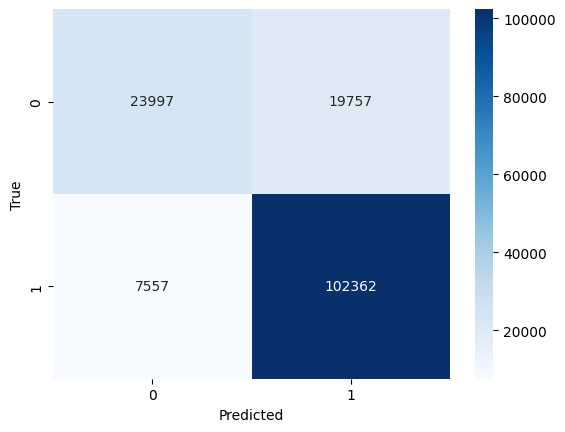

In [53]:
print(classification_report(y_test, y_pred_mnb))

cm = confusion_matrix(y_test, y_pred_mnb)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

**Classification report**: higher precision and recall for positive reviews - likely due to class imbalance - the model better learns patterns from positive reviews.

**Confusion matrix takeaways**
- *High True Positives:* Great at predicting positive reviews.
- *High False Positives:* Likely because the model is biased towards predicting positive sentiment.
- *Low False Negatives:* Few positive reviews were misclassified = good because its not missing many positive reviews.
- *Low True Negatives:* Struggling with correctly identifying negative sentiment - likely because it hasn't learned the patterns of negative reviews as well.

#### <a id='toc1_10_3_2_'></a>[**Precision-recall curve evaluation**](#toc0_)

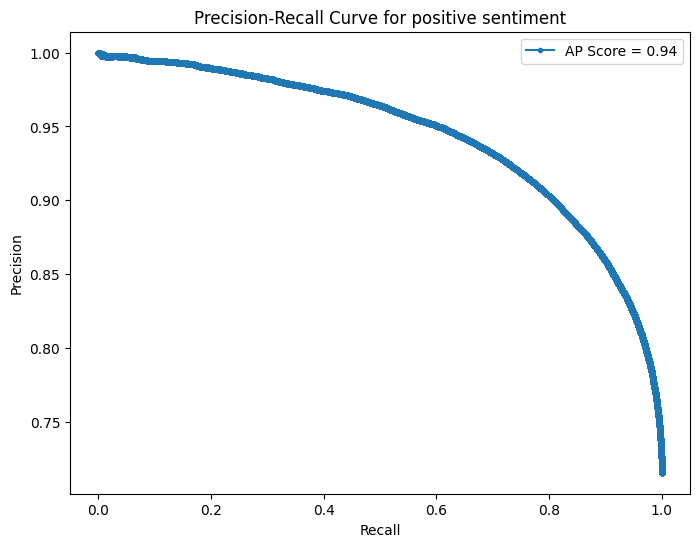

In [ ]:
# Precision-recall curve for majority class
y_scores_pos_mnb = grid_mnb.predict_proba(X_test)[:, 1]
plot_precision_recall_curve(y_test, y_scores_pos_mnb, 'positive')

**PR curve for majority class:**
* Precision remains close to 1.0 for a large portion of the recall range, meaning the model is highly confident when predicting positive reviews.
* Even at high recall, precision only drops slightly, suggesting the model rarely misclassifies non-positive reviews as positive.
* High AP score - suggests the model performs well on the majority class - expected because the model easier these patterns due to class imbalance.

Since the curve is based on the majority class, it is not as informative. Therefore we also look at the minority class:

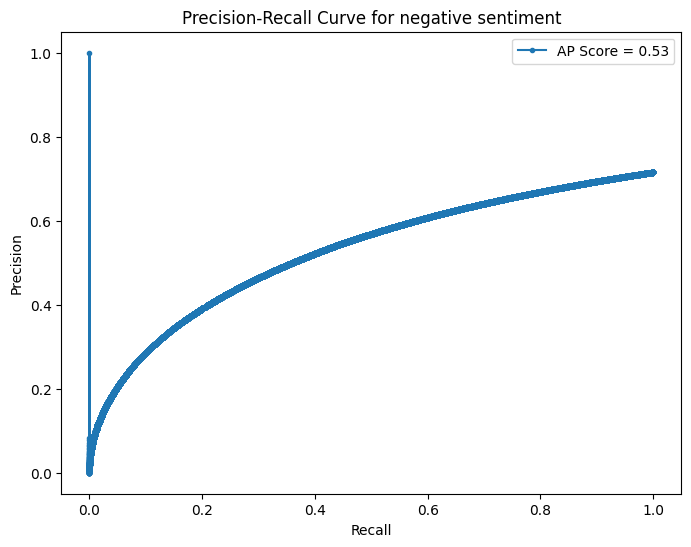

In [ ]:
# Precision-recall curve for minority class
y_scores_neg_mnb = grid_mnb.predict_proba(X_test)[:, 0]
plot_precision_recall_curve(y_test, y_scores_neg_mnb, 'negative')

**PR curve for minority class:**
- AP Score = 0.53: Indicates moderate ability to identify negative reviews — reasonable given the imbalance.
- Initial Sharp Drop: Precision is high when recall is low (model is very selective), but quickly falls as more negative reviews are predicted.
- Precision vs. Recall Tradeoff: As recall increases, precision fluctuates — reflects difficulty in consistently identifying negatives without false positives.
- Recall = 1.0, Precision ≈ 0.8: Model eventually captures all negatives, but precision suffers — typical in imbalanced datasets where the model leans toward the majority (positive) class.

**PR curves summary:** MultinomialMB is excellent at predicting positive reviews but struggles with negatives. Since most reviews are positive, the model may have learned to favor positive predictions, at the expense of recall for negative reviews.

#### <a id='toc1_10_3_3_'></a>[**Top features visualization**](#toc0_)

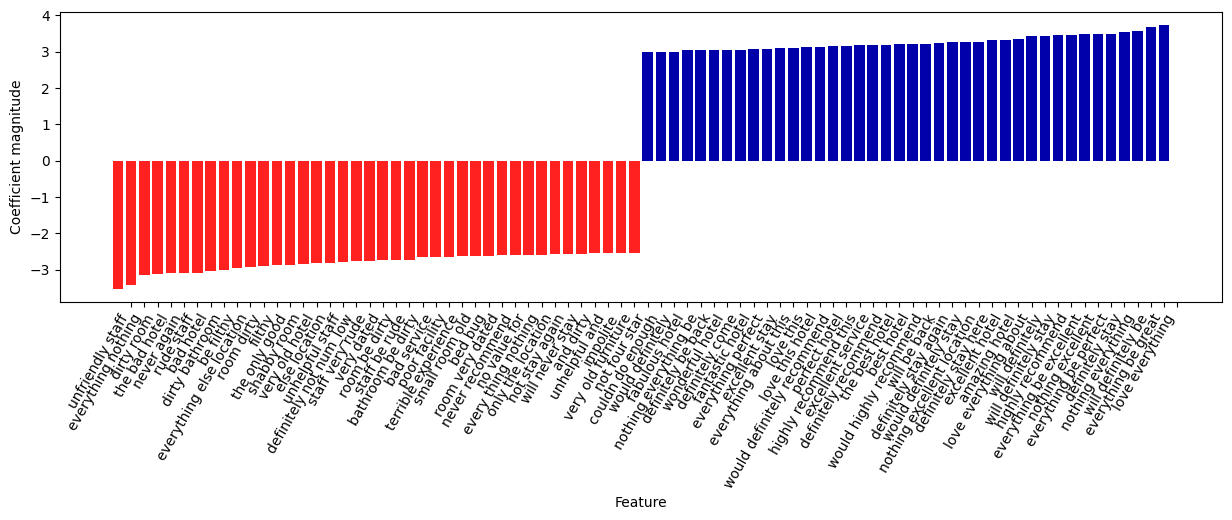

In [ ]:
# Visualizing the top 20 features that are most indicative of positive and negative sentiment of reviews from the best MultinomialNB model.
visualize_top_features(grid_mnb, X_train, classifier_step="multinomialnb")

**Top 20 Domain Features – Takeaways:**
- Positive Indicators: Features with the highest coefficients signal strong association with positive sentiment; lowest coefficients indicate negative sentiment.
- "Nothing" as Positive: The model associates phrases starting with "nothing" (e.g., "nothing excellent") with positive sentiment — likely because such phrases often appear in the Negative_Review field, implying absence of complaints.
- "Everything nothing" as Negative: Though used in positive reviews (e.g., "I liked everything. Nothing to complain about."), the model flags this bigram as negative — likely due to "nothing" usually appearing at the start of positive phrases, and "everything nothing" violating that learned pattern.

## <a id='toc1_11_'></a>[**Complement NB Model**](#toc0_)

Chosen because it handles imbalanced data better by adjusting feature weights that are overrepresented in the majority class, making it less biased toward the majority class. We expect improved negative review classification performance over MultinomialNB.

### <a id='toc1_11_1_'></a>[**Model building**](#toc0_)

Same vectorizer and gridsearch params as Multinomial used, as they are suitable for text classification tasks and have been optimized for our dataset. 

In [ ]:
if os.path.exists('grid_cnb.pkl'):
    grid_cnb = joblib.load('grid_cnb.pkl')
else:
    pipe_cnb = make_pipeline(TfidfVectorizer(min_df = 5, max_df=0.8, norm='l2'), ComplementNB())
    param_grid = {'complementnb__alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'tfidfvectorizer__ngram_range': [(1, 1), (1, 2), (1, 3)]}
    kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    grid_cnb = GridSearchCV(pipe_cnb, param_grid, cv=kfold, scoring='f1', refit=True, n_jobs=-1, return_train_score=True)
    grid_cnb.fit(X_train, y_train)

print("Best parameters: {}".format(grid_cnb.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_cnb.best_score_))
print("Best estimator: {}".format(grid_cnb.best_estimator_))

Best parameters: {'complementnb__alpha': 1, 'tfidfvectorizer__ngram_range': (1, 3)}
Best cross-validation score: 0.87
Best estimator: Pipeline(steps=[('tfidfvectorizer',
                 TfidfVectorizer(max_df=0.8, min_df=5, ngram_range=(1, 3))),
                ('complementnb', ComplementNB(alpha=1))])


### <a id='toc1_11_2_'></a>[**Heatmaps**](#toc0_)

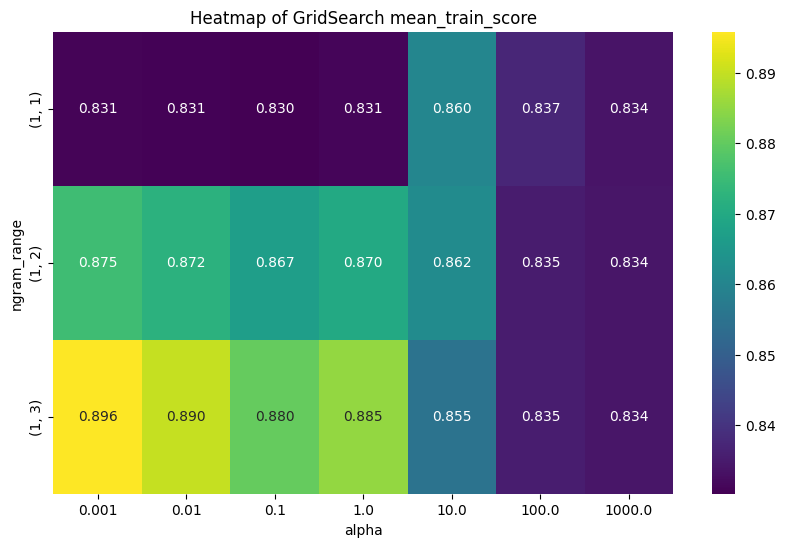

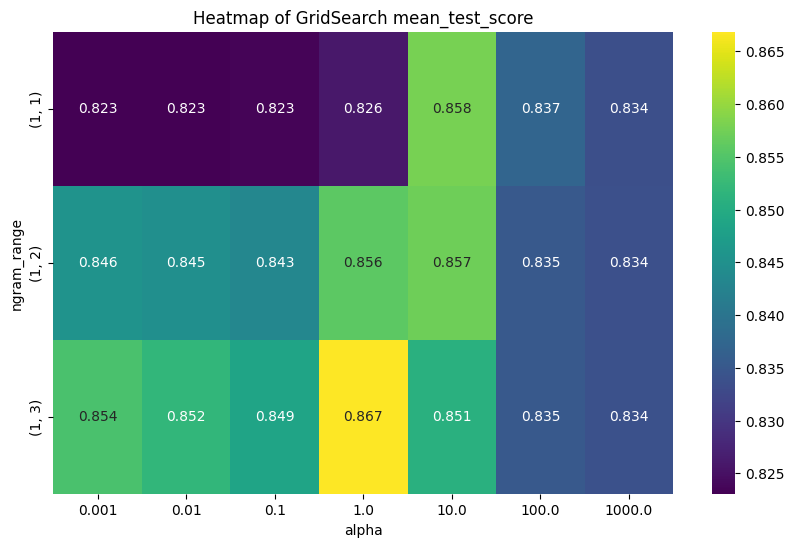

In [ ]:
# Heat maps of mean cross-validation f1 score as a function of the parameters ngram_range and alpha
plot_gridsearch_heatmap(grid_cnb, 
                        x_param='complementnb__alpha', 
                        y_param='tfidfvectorizer__ngram_range', score_metric='mean_train_score')
plot_gridsearch_heatmap(grid_cnb, 
                        x_param='complementnb__alpha', 
                        y_param='tfidfvectorizer__ngram_range', score_metric='mean_test_score')

- Best F1-score achieved with ngram_range=(1,3) and alpha=1, aligning with results from the MultinomialNB model.
- Trigrams help: (1,3) consistently outperforms other ranges across alpha values, suggesting value in capturing context beyond single or paired words.
- Unigrams underperform: (1,1) lags behind (1,2) and (1,3) for alpha values between 0.001–1, indicating that relying on single words and low smoothing leads to underfitting.

### <a id='toc1_11_3_'></a>[**Predicting sentiment and evaluating the model**](#toc0_)

In [ ]:
y_pred_cnb = grid_cnb.predict(X_test)

#### <a id='toc1_11_3_1_'></a>[**Confusion matrix and classification report**](#toc0_)

              precision    recall  f1-score   support

           0       0.65      0.72      0.68     43754
           1       0.88      0.85      0.87    109919

    accuracy                           0.81    153673
   macro avg       0.77      0.78      0.78    153673
weighted avg       0.82      0.81      0.81    153673



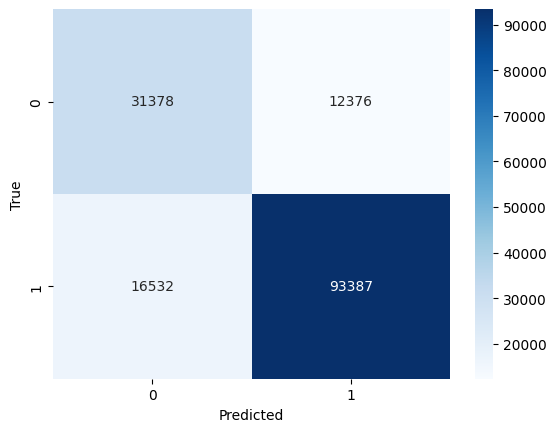

In [60]:
print(classification_report(y_test, y_pred_cnb))

cm = confusion_matrix(y_test, y_pred_cnb)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

**Confusion matrix takeaways:**
* *High True Positives:* Great at predicting positive reviews - expected due to class imbalance.    
* *More False Negatives Than False Positives:* Distribution of FP and FN is more balanced than in MultinomialNB, indicating ComplementNB is not as conservative in predicting negative.
* *Low True Negatives:* Struggles with correctly identifying negative sentiment, but the number of TN is higher than in MultinomialNB, suggesting ComplementNB has learned the patterns of negative reviews better.

#### <a id='toc1_11_3_2_'></a>[**Precision-recall curve evaluation**](#toc0_)

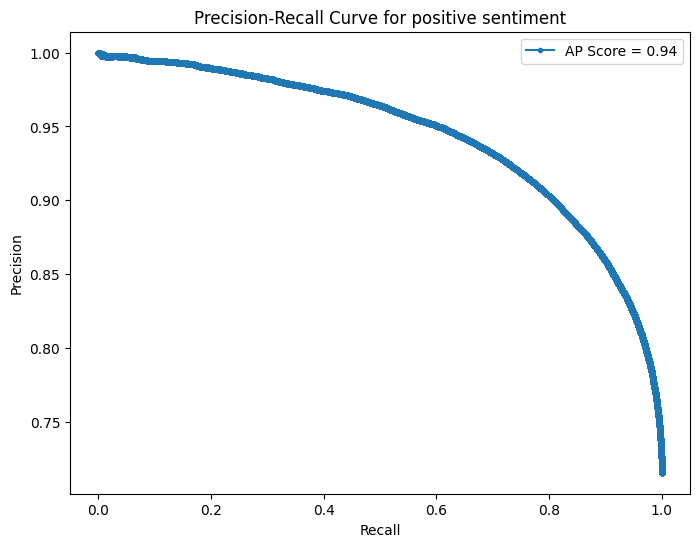

In [ ]:
# Precision-recall curve for the majority class, i.e. positive sentiment
y_scores_pos_cnb = grid_cnb.predict_proba(X_test)[:, 1]
plot_precision_recall_curve(y_test, y_scores_pos_cnb, 'positive')

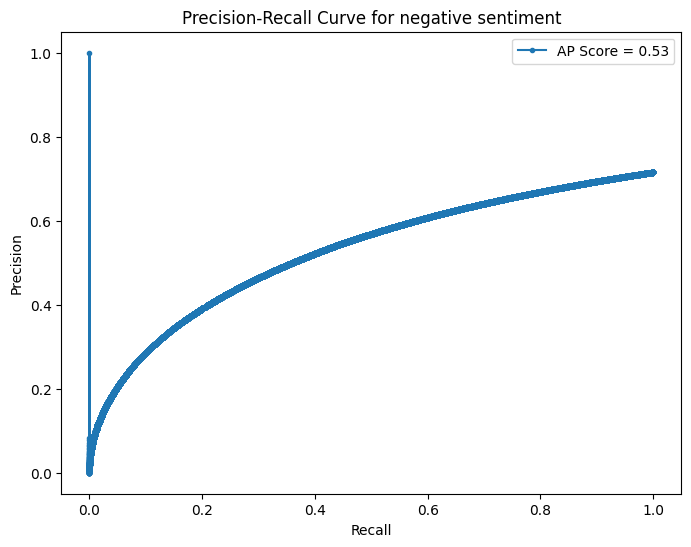

In [ ]:
# Precision-recall curve for the minority class, i.e. negative sentiment
y_scores_neg_cnb = grid_cnb.predict_proba(X_test)[:, 0]
plot_precision_recall_curve(y_test, y_scores_neg_cnb, 'negative')

PR-curves for positive and negative sentiment are identical to those from MultinomialNB. This is interesting, as their confusion matrices differ slightly.
To investigate this further, we plot a histogram of predicted probabilities.

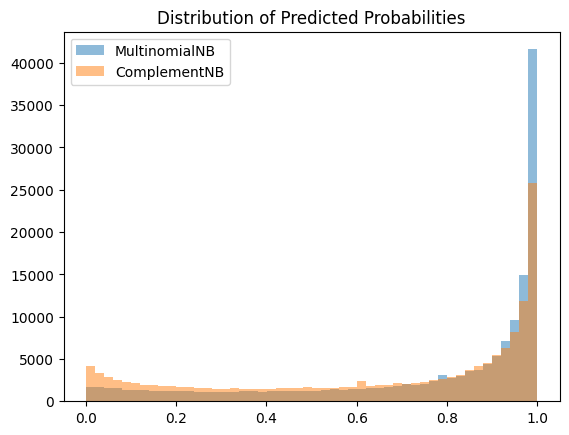

In [ ]:
plt.hist(y_scores_pos_mnb, bins=50, alpha=0.5, label='MultinomialNB')
plt.hist(y_scores_pos_cnb, bins=50, alpha=0.5, label='ComplementNB')
plt.legend()
plt.title("Distribution of Predicted Probabilities")
plt.show()

**Result**
* Similar shape of distributed prediction probabilities.
* Both MultinomialNB and ComplementNB are confident in their predictions, but ComplementNB catches more negative sentiment and less positive sentiment than MultinomialNB.
* Distribution curve: suggests it is not strange that their PR-Curves are the same, e.g. they are almost equally confident in classifying sentiment, rather, they just catch different amounts of each class, which is expected. 

#### <a id='toc1_11_3_3_'></a>[**Top features visualization**](#toc0_)

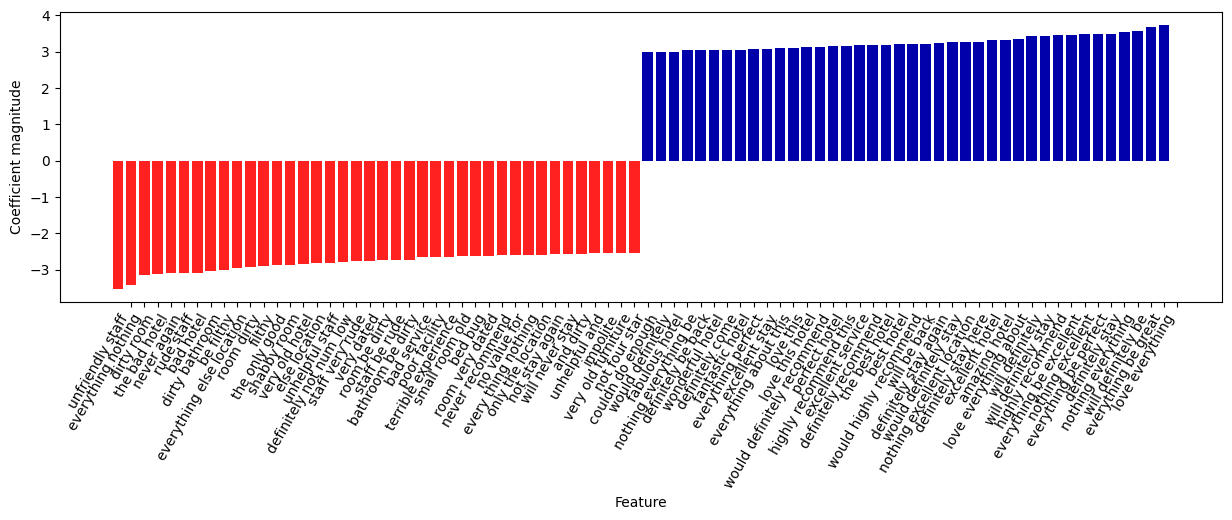

In [ ]:
# Visualizing the top 20 features that are most indicative of positive and negative sentiment of reviews from the best ComplementNB model.
visualize_top_features(grid_cnb, X_train, classifier_step="complementnb")

Many of the same word combinations as in MultinomialNB appear - not surprising, as the models perform very similar.

## <a id='toc1_12_'></a>[**Light Gradient Boosting Machine Classifier**](#toc0_)


**Chosen because it can handle:**
* Large datasets and high-dimentional data faster than XGBoost. 
* Class imbalance - the parameter "is_unbalance" adjusts the weights of the classes based on their frequency in the dataset.

RandomizedSearch used instead of GridSearch because: less computationally expensive and time consuming. 

### <a id='toc1_12_1_'></a>[**Creating Pipeline, Vectorizer and RandomizedSearch with cross validation**](#toc0_)

In [ ]:
if os.path.exists('rand.pkl'):
    rand = joblib.load('rand.pkl')
else:
    pipe_lgbm = make_pipeline(
        TfidfVectorizer(min_df=5, max_df=0.8, norm='l2'),
        LGBMClassifier(is_unbalance=True, random_state=42)
    )
    param_dist = {
        'lgbmclassifier__num_leaves': [31, 63, 127],  
        'lgbmclassifier__max_depth': [5, 7, 10], 
        'lgbmclassifier__learning_rate': [0.01, 0.05, 0.1],
        'lgbmclassifier__n_estimators': [100, 300, 500],
        'lgbmclassifier__subsample': [0.8, 1.0],
        'lgbmclassifier__colsample_bytree': [0.8, 1.0]
    }
    kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    rand = RandomizedSearchCV(
        pipe_lgbm,
        param_distributions=param_dist,
        cv=kfold,
        scoring='f1',
        refit=True,
        n_iter=20,
        verbose=2,
        n_jobs=2,
        error_score='raise'
    )
    rand.fit(X_train, y_train)

print("Best parameters: {}".format(rand.best_params_))
print("Best cross-validation score: {:.2f}".format(rand.best_score_))
print("Best estimator: {}".format(rand.best_estimator_))

Best parameters: {'lgbmclassifier__subsample': 1.0, 'lgbmclassifier__num_leaves': 63, 'lgbmclassifier__n_estimators': 100, 'lgbmclassifier__max_depth': 10, 'lgbmclassifier__learning_rate': 0.01, 'lgbmclassifier__colsample_bytree': 0.8}
Best cross-validation score: 0.85
Best estimator: Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer(max_df=0.8, min_df=5)),
                ('lgbmclassifier',
                 LGBMClassifier(colsample_bytree=0.8, is_unbalance=True,
                                learning_rate=0.01, max_depth=10, num_leaves=63,
                                random_state=42))])


### <a id='toc1_12_2_'></a>[**Predicting sentiment and evaluating the model**](#toc0_)

In [ ]:
y_pred_lgbm = rand.predict(X_test)

c:\Users\runar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


#### <a id='toc1_12_2_1_'></a>[**Confusion matrix and classification report**](#toc0_)

              precision    recall  f1-score   support

           0       0.63      0.47      0.54     43754
           1       0.81      0.89      0.85    109919

    accuracy                           0.77    153673
   macro avg       0.72      0.68      0.69    153673
weighted avg       0.76      0.77      0.76    153673



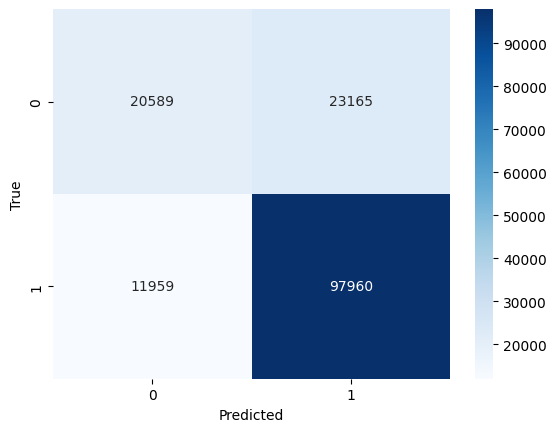

In [67]:
print(classification_report(y_test, y_pred_lgbm))
cm = confusion_matrix(y_test, y_pred_lgbm)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

**Performance takeaways:**
* Low f1-score for negative sentiment: 0.54 - struggles to identify negative sentiment.
* High TP and f1-score for positive sentiment: great at predicting positive reviews.
* More FP than TN: biased towards predicting positive sentiment - has not learned negative review patterns well. 

#### <a id='toc1_12_2_2_'></a>[**Precision-recall curve evaluation**](#toc0_)

c:\Users\runar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


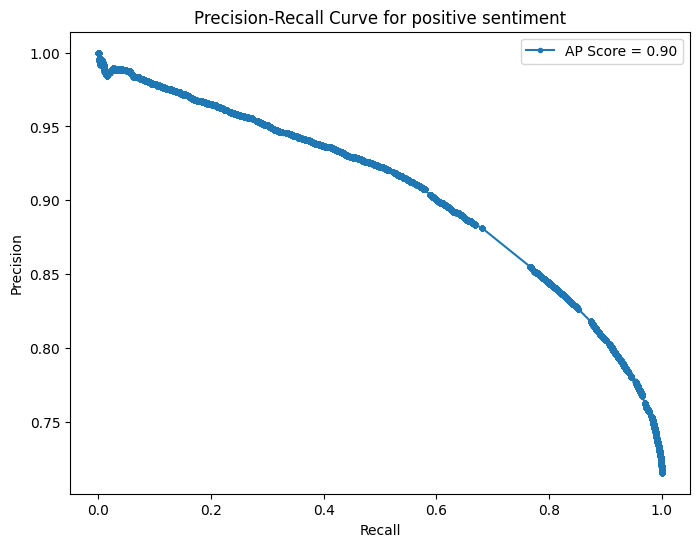

c:\Users\runar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


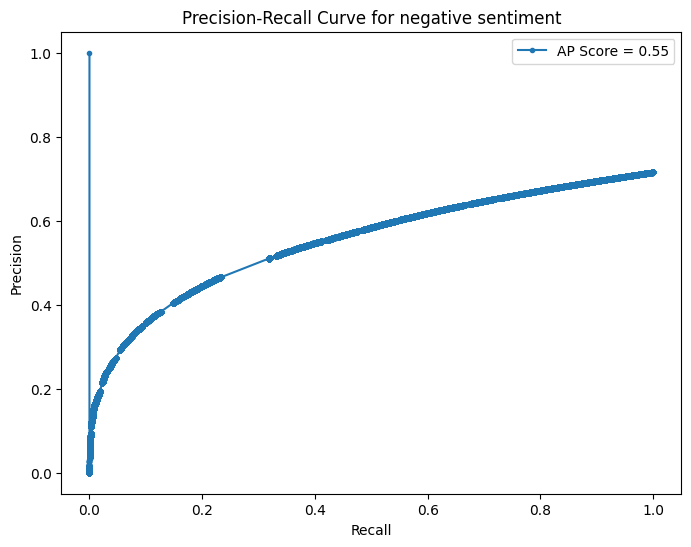

In [ ]:
# Precision-recall for the majority class, i.e. positive sentiment
y_scores_pos_lgbm = rand.predict_proba(X_test)[:, 1]
plot_precision_recall_curve(y_test, y_scores_pos_lgbm, 'positive')

# Precision-recall for the minority class, i.e. negative sentiment
y_scores_neg_lgbm = rand.predict_proba(X_test)[:, 0]
plot_precision_recall_curve(y_test, y_scores_neg_lgbm, 'negative')

**PR curves takeaways:**
* Similar curve shape and approximately same AP scores as Naive Bayes models 
* Sparse curve: less smooth than NB models - typical for tree-based models - they group data into leaves, giving many samples the same prediction score, which results in fewer points on the curve = more stepped curve.

#### <a id='toc1_12_2_3_'></a>[**Vizualising important features**](#toc0_)

C:\Users\runar\AppData\Local\Temp\ipykernel_8512\2637428754.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='importance', y='features', data=fi_sorted, palette='viridis')


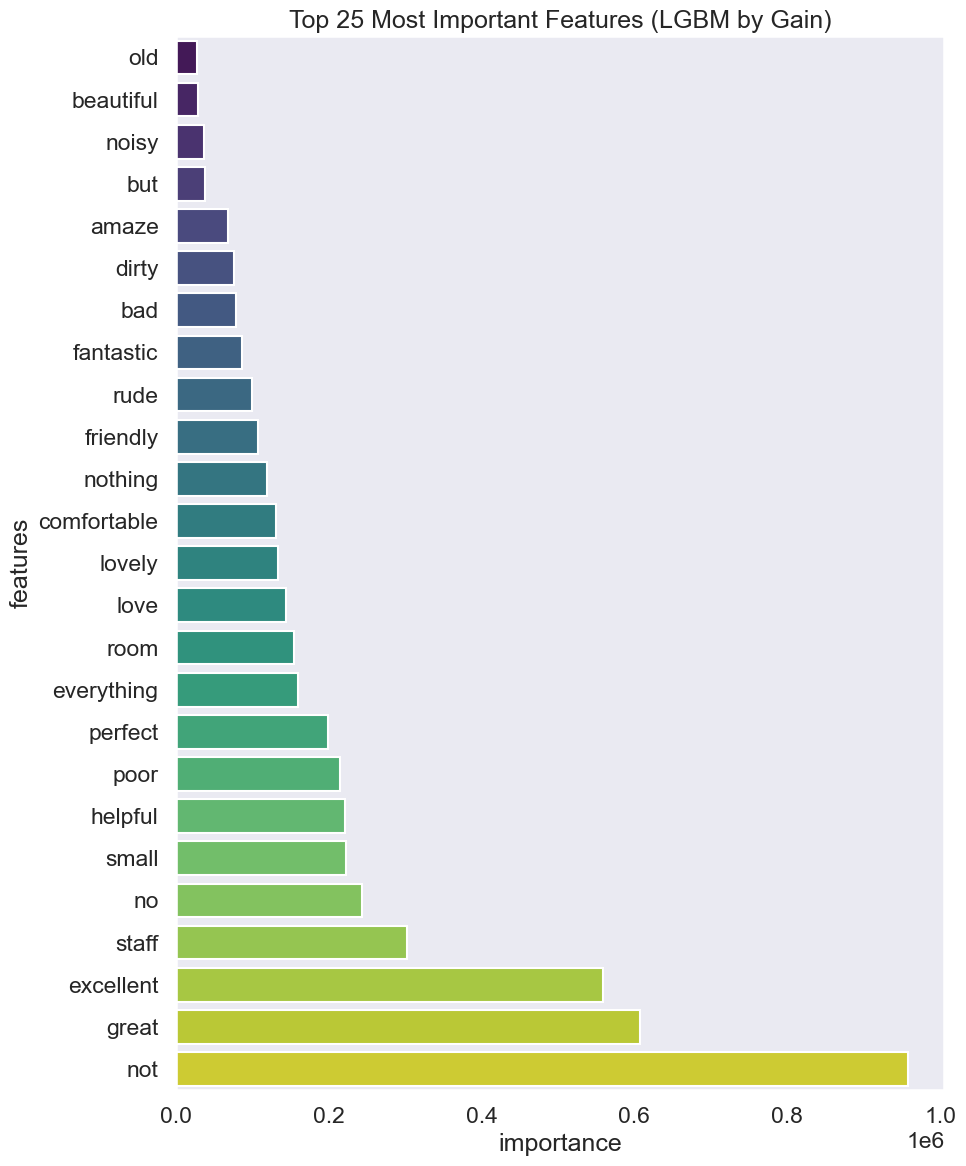

In [ ]:
# Extract fitted vectorizer and model
vectorizer = rand.best_estimator_.named_steps['tfidfvectorizer']
lgbm_tuned = rand.best_estimator_.named_steps['lgbmclassifier']

# Get feature names and importances
feature_names = vectorizer.get_feature_names_out()
importances = lgbm_tuned.booster_.feature_importance(importance_type='gain')

# Create DataFrame for feature importances
fi = pd.DataFrame({
    'features': feature_names,
    'importance': importances
})

# Sort and plot
fi_sorted = fi.sort_values(by='importance', ascending=True).tail(25)  # plot top 25 for clarity

sns.set_context("talk")
sns.set_style('dark')

plt.figure(figsize=(10, 12))
sns.barplot(x='importance', y='features', data=fi_sorted, palette='viridis', hue='features', legend=False)
plt.title('Top 25 Most Important Features (LGBM by Gain)')
plt.tight_layout()
plt.show()

**Takeaways:**
- “Not” is the most influential word — makes sense as a common negation that can flip sentiment in either direction.
- The model picks up both opinion words (e.g., great, poor) and contextual words (e.g., staff, room, comfortable), showing it captures both emotion and topic relevance.

## <a id='toc1_13_'></a>[**LSTM Model**](#toc0_)

### <a id='toc1_13_1_'></a>[**Preprocessing data for LSTM**](#toc0_)

#### <a id='toc1_13_1_1_'></a>[**Splitting the dataset into training, validation and test sets**](#toc0_)

In [ ]:
print(len(X)) 
print(len(y)) 

512243
512243


In [ ]:
# Splitting the data into 60% training, 20% validation, and 20% test sets all with class balance maintained
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

X_temp = X_temp.to_numpy()
y_temp = y_temp.to_numpy()

X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.25, random_state=42, stratify=y_temp  
)

#### <a id='toc1_13_1_2_'></a>[**Tokenizing and padding - preparing reviews for LSTM**](#toc0_)

**Tokenizer settings explanation:**
- num_words=5000: Limits the tokenizer to the top 5,000 most frequent words — reduces vocabulary size and improves model efficiency.
- texts_to_sequences: Converts each review into a sequence of integers, mapping each word to its corresponding index in the vocabulary.

In [72]:
tokenizer = Tokenizer(num_words=5000, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)
X_val_seq = tokenizer.texts_to_sequences(X_val)

In [73]:
max_length_train = max([len(review) for review in X_train_seq])
max_length_test = max([len(review) for review in X_test_seq])
max_length_val = max([len(review) for review in X_val_seq])
max_length = max(max_length_train, max_length_test, max_length_val)
print(max_length)

763


As we can see, the model will receive inputs that all have a consistent size of 763 tokens.

To better understand how many reviews are really long and how many are short we plot a histogram of the review lengths.

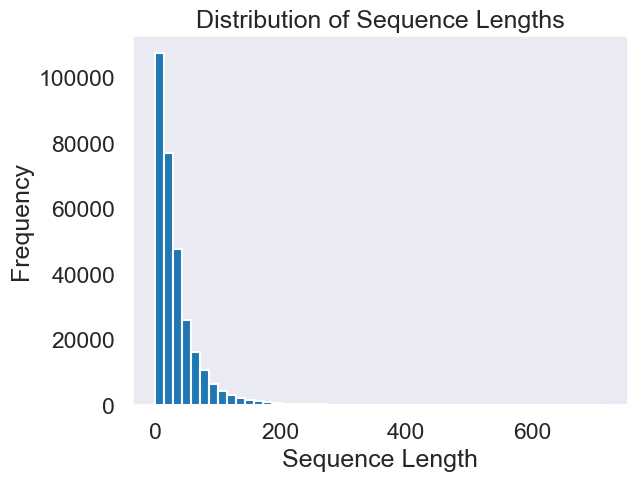

In [74]:
seq_lengths = [len(review) for review in X_train_seq]
plt.hist(seq_lengths, bins=50)
plt.xlabel('Sequence Length')
plt.ylabel('Frequency')
plt.title('Distribution of Sequence Lengths')
plt.show()

In [75]:
print(pd.Series(seq_lengths).describe())

count    307345.000000
mean         34.008473
std          39.057640
min           0.000000
25%          11.000000
50%          22.000000
75%          43.000000
max         718.000000
dtype: float64


**Sequence Length Takeaway:**

- Max length of 753 is unnecessary — 75% of reviews are under 43 tokens, and the histogram shows little added value beyond 150 tokens.
- New max length: 150 — balances efficiency and information retention, avoiding excessive padding.
- Padding/truncation ensures fixed-length inputs, which is required for LSTM models to function properly.

In [76]:
max_length = 150

X_train_padded = pad_sequences(X_train_seq, maxlen=max_length, padding='post', truncating='post')
X_test_padded = pad_sequences(X_test_seq, maxlen=max_length, padding='post', truncating='post')
X_val_padded = pad_sequences(X_val_seq, maxlen=max_length, padding='post', truncating='post')

In [ ]:
print("X_train_padded:")
print(X_train_padded)
print("\nX_test_padded:")
print(X_test_padded)
print("\nX_val_padded:")
print(X_val_padded)

X_train_padded:
[[   2  593   11 ...    0    0    0]
 [  22  160  470 ...    0    0    0]
 [  22  139  637 ...    0    0    0]
 ...
 [  16   75    5 ...    0    0    0]
 [  78  593    3 ...    0    0    0]
 [ 133    2 2186 ...    0    0    0]]

X_test_padded:
[[   2  147  335 ...    0    0    0]
 [  20 1493   23 ...    0    0    0]
 [  71  758    3 ...    0    0    0]
 ...
 [   2   12   10 ...    0    0    0]
 [ 463   31    2 ...    0    0    0]
 [  35  545   23 ...    0    0    0]]

X_val_padded:
[[  21   89 1460 ...    0    0    0]
 [  14   12   16 ...    0    0    0]
 [ 147  335    6 ...    0    0    0]
 ...
 [ 106  124   14 ...    0    0    0]
 [  41    3   35 ...    0    0    0]
 [   7    3  148 ...    0    0    0]]


### <a id='toc1_13_2_'></a>[**Building the LSTM model**](#toc0_)

**Model Architecture & Training Setup:**
- Sequential Model:
    - Linear stack of layers.
- Embedding Layer:
    - input_dim=5000: Vocabulary size
    - output_dim=128: Word vectors
    - input_length=max_length: Fixed-length input
- Bidirectional LSTM:
    - units=128, dropout=0.3, return_sequences=False
    - Learns context in both directions
- Dense Layers:
    - Dense(128, relu) → BatchNormalization() → Dropout(0.3)
    - Dense(64, relu) → Dropout(0.3)
- Output Layer:
    - Dense(1, sigmoid): Outputs probability for binary classification
- Compilation:
    - Loss: BinaryFocalCrossentropy(alpha=0.25, gamma=2.0) — focuses on hard examples
    - Optimizer: adam
    - Metrics: accuracy, AUC(curve='PR') for class imbalance
- Callbacks:
    - EarlyStopping(patience=3)
    - ReduceLROnPlateau()
- Build Input Shape:
    - input_shape=(None, max_length)

In [ ]:
model = Sequential()

model.add(Embedding(input_dim=5000, output_dim=128))

model.add(Bidirectional(LSTM(units=128, dropout=0.3,  return_sequences=False)))

model.add(Dense(128, activation="relu"))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Dense(64, activation="relu"))
model.add(Dropout(0.3))

model.add(Dense(1, activation='sigmoid'))

model.compile(loss=keras.losses.BinaryFocalCrossentropy(alpha=0.25, gamma=2.0), optimizer='adam', metrics=['accuracy', tf.keras.metrics.AUC(curve='PR')])

early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
reduce_learning_rate = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=1, min_lr=0.00001)

model.build(input_shape=(None, max_length))

model.summary()

c:\Users\runar\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)         │ (None, 150, 128)       │       640,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_6 (Bidirectional) │ (None, 256)            │       263,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 944,897 (3.60 MB)

 Trainable params: 944,641 (3.60 MB)

 Non-trainable params: 256 (1.00 KB)

### <a id='toc1_13_3_'></a>[**Training the LSTM model**](#toc0_)

In [ ]:
class_weights = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train
)
class_weights_dict = dict(enumerate(class_weights))

history = model.fit(X_train_padded, y_train, epochs=10, batch_size=256, validation_data=(X_val_padded, y_val), callbacks=[early_stopping, reduce_learning_rate], class_weight=class_weights_dict)

Epoch 1/10
1201/1201 ━━━━━━━━━━━━━━━━━━━━ 920s 762ms/step - accuracy: 0.7281 - auc_1: 0.9161 - loss: 0.1320 - val_accuracy: 0.7584 - val_auc_1: 0.9464 - val_loss: 0.1200 - learning_rate: 0.0010
Epoch 2/10
1201/1201 ━━━━━━━━━━━━━━━━━━━━ 873s 727ms/step - accuracy: 0.7937 - auc_1: 0.9471 - loss: 0.1114 - val_accuracy: 0.7987 - val_auc_1: 0.9507 - val_loss: 0.1066 - learning_rate: 0.0010
Epoch 3/10
1201/1201 ━━━━━━━━━━━━━━━━━━━━ 856s 713ms/step - accuracy: 0.8045 - auc_1: 0.9530 - loss: 0.1062 - val_accuracy: 0.8242 - val_auc_1: 0.9512 - val_loss: 0.0992 - learning_rate: 0.0010
Epoch 4/10
1201/1201 ━━━━━━━━━━━━━━━━━━━━ 847s 705ms/step - accuracy: 0.8110 - auc_1: 0.9559 - loss: 0.1030 - val_accuracy: 0.8033 - val_auc_1: 0.9516 - val_loss: 0.1069 - learning_rate: 0.0010
Epoch 5/10
1201/1201 ━━━━━━━━━━━━━━━━━━━━ 831s 692ms/step - accuracy: 0.8214 - auc_1: 0.9611 - loss: 0.0978 - val_accuracy: 0.8005 - val_auc_1: 0.9524 - val_loss: 0.1114 - learning_rate: 2.0000e-04
Epoch 6/10
1201/1201 ━━━━━

### <a id='toc1_13_4_'></a>[**Predicting sentiment**](#toc0_)

In [ ]:
y_pred = model.predict(X_test_padded)

3202/3202 ━━━━━━━━━━━━━━━━━━━━ 111s 35ms/step


### <a id='toc1_13_5_'></a>[**Evaluating LSTM model and plotting accuracy and loss**](#toc0_)

3202/3202 ━━━━━━━━━━━━━━━━━━━━ 117s 36ms/step
0.8920616108977033
0.9511967375559408
3202/3202 ━━━━━━━━━━━━━━━━━━━━ 121s 38ms/step - accuracy: 0.8224 - auc_1: 0.9511 - loss: 0.0991
Test accuracy: 0.8215990662574768
Test loss: 0.09955291450023651


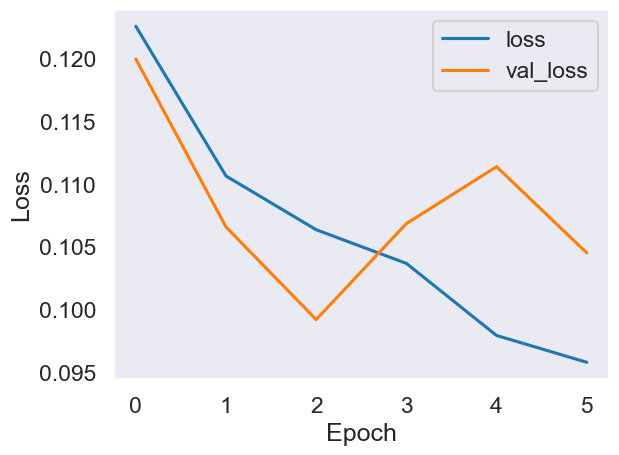

In [ ]:
X_test_padded_np = np.array(X_test_padded)
y_test_np = np.array(y_test)

# Calculting predictions and probabilities on the validation set
y_pred_probs = model.predict(X_val_padded)
print(roc_auc_score(y_val, y_pred_probs))
print(average_precision_score(y_val, y_pred_probs))

# test the model
loss, accuracy, _ = model.evaluate(X_test_padded_np, y_test_np)
print('Test accuracy:', accuracy)
print('Test loss:', loss)

# plot the training and validation loss
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

**Graph insights**:
- Training loss decreases steadily as expected, indicating the model is learning.
- Validation loss reaches its minimum at epoch 2, then begins to increase - sign of overfitting.
- Overall: loss values remain low and are trending downwards, and the level of overfitting observed is minor and acceptable at this stage.

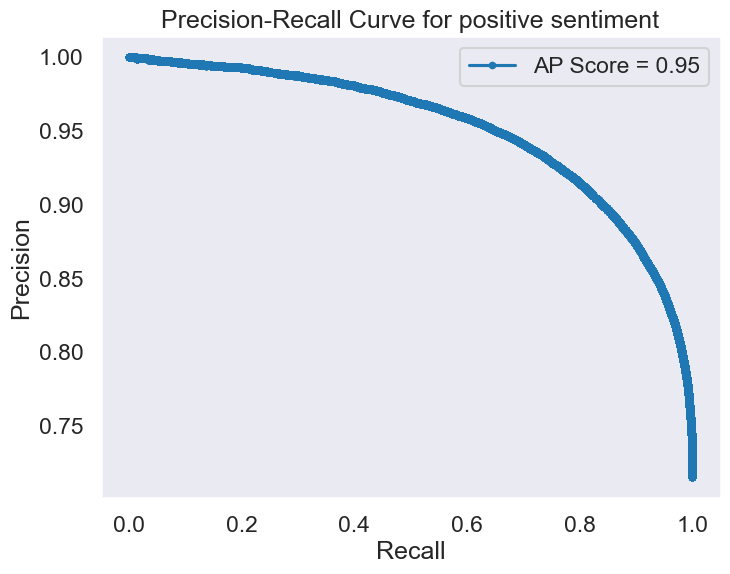

In [ ]:
plot_precision_recall_curve(y_val, y_pred_probs, 'positive')

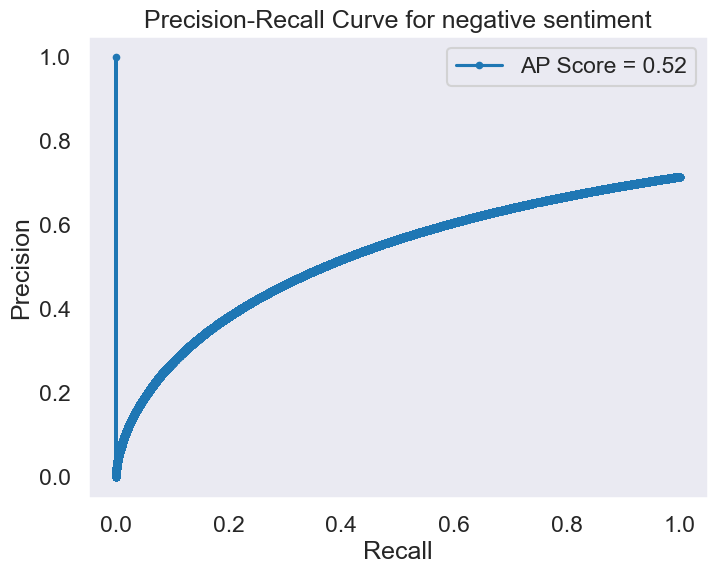

In [98]:
y_probs_negative = 1 - y_pred_probs
plot_precision_recall_curve(y_val, y_probs_negative, 'negative')

PR-Curves are almost identical to previous models. Slight difference, but not significant.

Predictions:
              precision    recall  f1-score   support

           0       0.67      0.75      0.70     29169
           1       0.89      0.85      0.87     73280

    accuracy                           0.82    102449
   macro avg       0.78      0.80      0.79    102449
weighted avg       0.83      0.82      0.82    102449



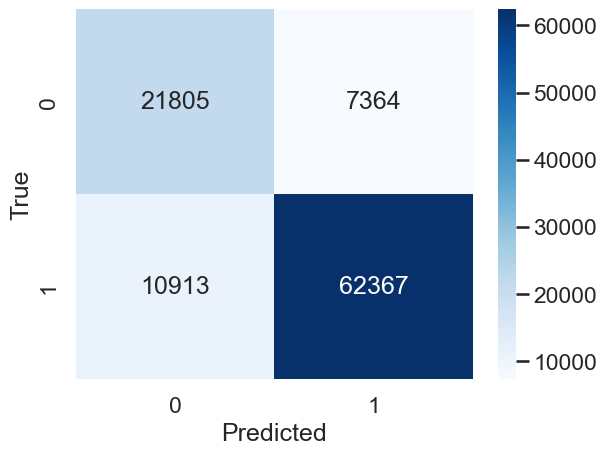

In [94]:
y_pred_binary = (y_pred > 0.5).astype(int)
print("Predictions:")
print(classification_report(y_test, y_pred_binary))

cm = confusion_matrix(y_test, y_pred_binary)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

- High True Positives 
- Relatively high True Negatives 
- Low instances of False Positives and False Negatives

## <a id='toc1_14_'></a>[**Summary**](#toc0_)

**Multinomial NB & Complement NB:**
- Despite being based off the same algorithm, ComplementNB is better at classifying negative sentiment - not surprising as ComplementNB usually is better for imbalanced datasets.
- Performance for positive sentiment: relatively similar, with ComplementNBs performance dipping a bit, to account for increased negative sentiment classification performance. 
- ComplementNB is more balanced in its ability to detect sentiment, thus being more suited for our task.

**LGBM**
- Performs slightly better than guessing on negative reviews.
- Performs well on positive reviews, similar to the Naive Bayes models.
- Potential reason for its relatively poor performance: LGBM's sensitivity to hyperparameters & the fact that tree-based models are not as suited for text classification tasks.

**LSTM**
- The best model for this task although being more complex and computationally expensive.
- Great at predicting positive, and much better at negative reviews - learns these patterns better - likely due to its ability to capture long-term dependencies and context in the text. This model is also more robust to noise and irrelevant features.
- We use bidirectional LSTM - allows the model to learn context from both directions in the text - may be a reason for its superior performance.

# <a id='toc2_'></a>[**Task 2 - Convolutional Neural Networks**](#toc0_)

## <a id='toc2_1_'></a>[**Importing libraries**](#toc0_)

In [1]:
from sklearn.model_selection import train_test_split
import tensorflow as tf
from keras.datasets import cifar10
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from collections import Counter
from sklearn.utils import resample
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import tensorflow_addons as tfa  
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve

import cv2
import nbformat
import re

## <a id='toc2_2_'></a>[**Loading dataset**](#toc0_)

In [2]:
# Loading the cifar10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Splitting the training data into training and validation sets 

# Validation set is used to monitor the model's performance during training 
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42, stratify=y_train)

## <a id='toc2_3_'></a>[**Visualizing images from the dataset**](#toc0_)

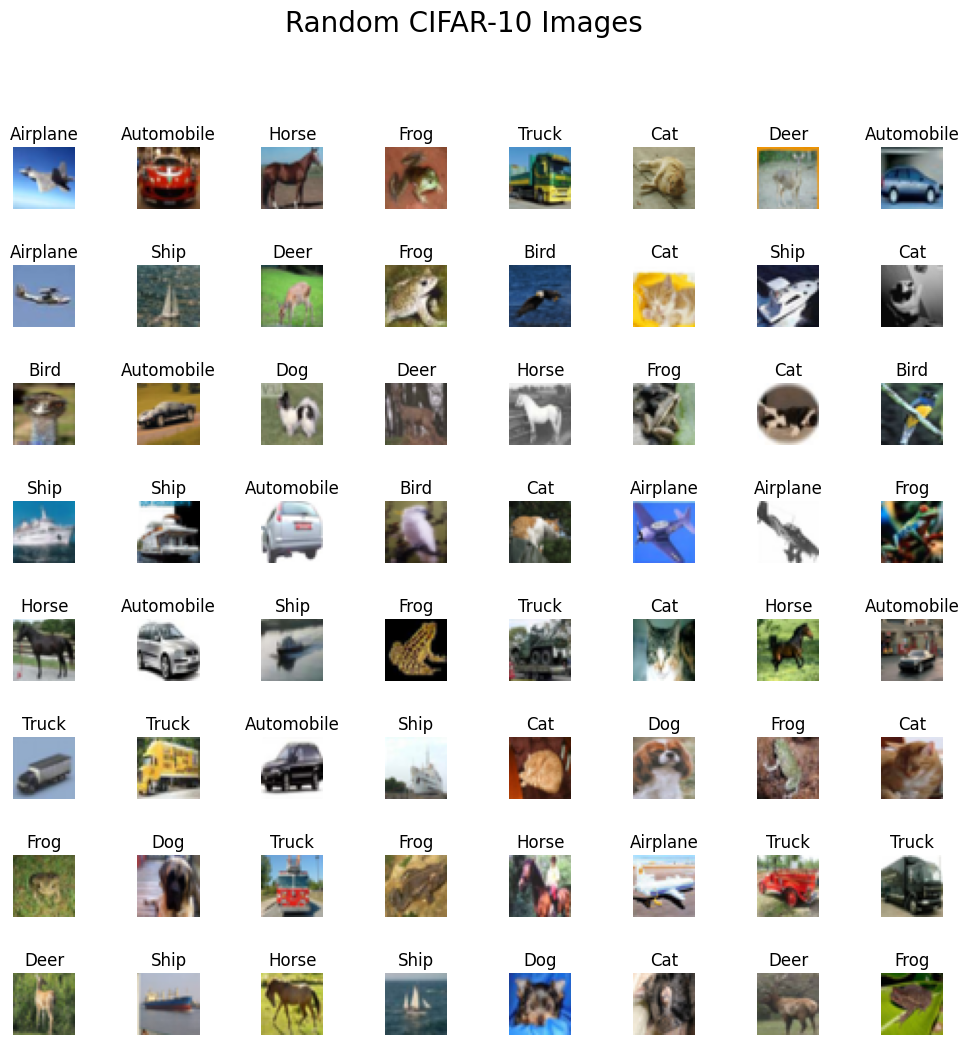

In [3]:
# Function to display a grid of random images from the dataset with their corresponding labels
def showImages(images_per_row, images_per_col, X, y, labels):
    X_rand, Y_rand = shuffle(X, y) # Shuffle the dataset

    fig, axes = plt.subplots(images_per_row, images_per_col, figsize=(12,12))
    axes = axes.ravel()

    for i in range(images_per_row * images_per_col):
        axes[i].imshow(X_rand[i])
        axes[i].set_title(labels[Y_rand[i].item()]) 
        axes[i].axis('off')

    plt.subplots_adjust(wspace=1) # Add spacing between images
    fig.suptitle('Random CIFAR-10 Images', fontsize=20)
    
    plt.show()

labels = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

images_per_row, images_per_col = 8, 8
showImages(images_per_row, images_per_col, x_train, y_train, labels)

## <a id='toc2_4_'></a>[**Exploring the dataset**](#toc0_)

In [4]:
# Shape of the data
print(f"Shape of x_train: {x_train.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of x_test: {x_test.shape}")
print(f"Shape of y_test: {y_test.shape}")
print(f"Shape of x_val: {x_val.shape}")
print(f"Shape of y_val: {y_val.shape}")

Shape of x_train: (40000, 32, 32, 3)
Shape of y_train: (40000, 1)
Shape of x_test: (10000, 32, 32, 3)
Shape of y_test: (10000, 1)
Shape of x_val: (10000, 32, 32, 3)
Shape of y_val: (10000, 1)


In [5]:
# Check the distribution of classes in the training set
counter = Counter(y_train.flatten())
print("Class distribution in training set:")
for label, count in counter.items():
    print(f"Class {labels[label]}: {count} samples")
    
# Check the distribution of classes in the validation set
counter = Counter(y_val.flatten())
print("\nClass distribution in validation set:")
for label, count in counter.items():
    print(f"Class {labels[label]}: {count} samples")
    
# Check the distribution of classes in the test set
counter = Counter(y_test.flatten())
print("\nClass distribution in test set:")
for label, count in counter.items():
    print(f"Class {labels[label]}: {count} samples")

Class distribution in training set:
Class Frog: 4000 samples
Class Horse: 4000 samples
Class Ship: 4000 samples
Class Cat: 4000 samples
Class Bird: 4000 samples
Class Automobile: 4000 samples
Class Deer: 4000 samples
Class Truck: 4000 samples
Class Airplane: 4000 samples
Class Dog: 4000 samples

Class distribution in validation set:
Class Bird: 1000 samples
Class Horse: 1000 samples
Class Automobile: 1000 samples
Class Truck: 1000 samples
Class Frog: 1000 samples
Class Ship: 1000 samples
Class Airplane: 1000 samples
Class Cat: 1000 samples
Class Dog: 1000 samples
Class Deer: 1000 samples

Class distribution in test set:
Class Cat: 1000 samples
Class Ship: 1000 samples
Class Airplane: 1000 samples
Class Frog: 1000 samples
Class Automobile: 1000 samples
Class Truck: 1000 samples
Class Dog: 1000 samples
Class Horse: 1000 samples
Class Deer: 1000 samples
Class Bird: 1000 samples


- Class distribution is balanced across all splits
- Small size of dataset could potentially lead to overfitting

## <a id='toc2_5_'></a>[**Data Augmentation to artifically expand the training set**](#toc0_)

- Horizontal flips only: Doubles the dataset, preserves natural variations, and prevents misleading distortions.
- Improves model generalization and help prevent overfitting by introducing variability in the data.

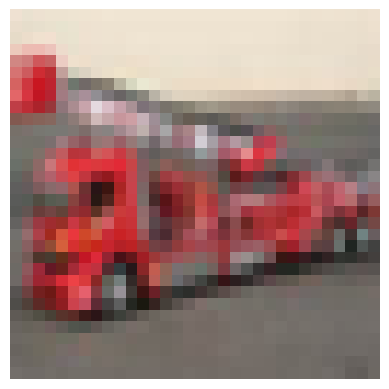

Truck image found in the training set before flipping.


In [6]:
def showImage(image):
    plt.imshow(image)
    plt.axis('off')
    plt.show()

def find_truck_image(x_train):
    for i in range(len(x_train) - 1, -1, -1):
        if y_train[i] == 9:  # Truck class
            showImage(x_train[i])
            break

find_truck_image(x_train)
print("Truck image found in the training set before flipping.")

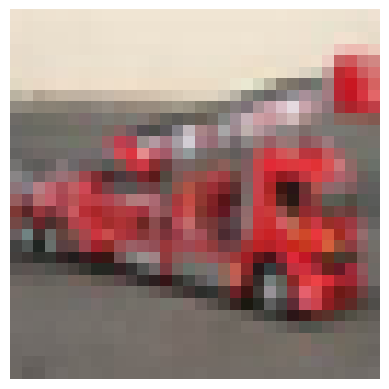

Truck image found in the training set after flipping.


In [7]:
# Double the training set by flipping the images
x_train_flipped = np.array([np.fliplr(image) for image in x_train])
# Create a copy of the labels for the flipped images
y_train_flipped = y_train.copy()

find_truck_image(x_train_flipped)
print("Truck image found in the training set after flipping.")

# Concatenate the original and flipped images
x_train = np.concatenate((x_train, x_train_flipped), axis=0)
y_train = np.concatenate((y_train, y_train_flipped), axis=0)

In [8]:
# Check the distribution of classes in the training set after flipping
counter = Counter(y_train.flatten())
print("Class distribution in training set after flipping:")
for label, count in counter.items():
    print(f"Class {labels[label]}: {count} samples")

Class distribution in training set after flipping:
Class Frog: 8000 samples
Class Horse: 8000 samples
Class Ship: 8000 samples
Class Cat: 8000 samples
Class Bird: 8000 samples
Class Automobile: 8000 samples
Class Deer: 8000 samples
Class Truck: 8000 samples
Class Airplane: 8000 samples
Class Dog: 8000 samples


## <a id='toc2_6_'></a>[**Preprocessing image data/features**](#toc0_)

In [9]:
# Converting the datatype of the image arrays to a format the model can work with
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

mean = np.mean(x_train, axis=(0, 1, 2), keepdims=True)  
std = np.std(x_train, axis=(0, 1, 2), keepdims=True)    

# Normalize the pixel values by subtracting the mean and dividing by the standard deviation - Goal: each channel (RGB) has mean = 0 and std = 1
epsilon = 1e-7 
x_train = (x_train - mean) / (std + epsilon)
x_test = (x_test - mean) / (std + epsilon)
x_val = (x_val - mean) / (std + epsilon)

# Printing min and max values of the normalized data
print("Min and Max pixel values after normalization is applied:")
print("Min x_train:", np.min(x_train), "Max x_train:", np.max(x_train))
print("Min x_test:", np.min(x_test), "Max x_test:", np.max(x_test))
print("Min x_val:", np.min(x_val), "Max x_val:", np.max(x_val))
print()
print("Post-normalization mean (should be ~0):", np.mean(x_train, axis=(0, 1, 2)))
print("Post-normalization std (should be ~1):", np.std(x_train, axis=(0, 1, 2)))

Min and Max pixel values after normalization is applied:
Min x_train: -0.6347637 Max x_train: 2.4525614
Min x_test: -0.6347637 Max x_test: 2.4525614
Min x_val: -0.6347637 Max x_val: 2.4525614

Post-normalization mean (should be ~0): [0.57555264 0.5714724  0.5727915 ]
Post-normalization std (should be ~1): [0.7014521 0.6981112 0.7273154]


This standardization ensures faster, more stable model training, helps the model learn more effectively, and prevents issues like vanishing gradients.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

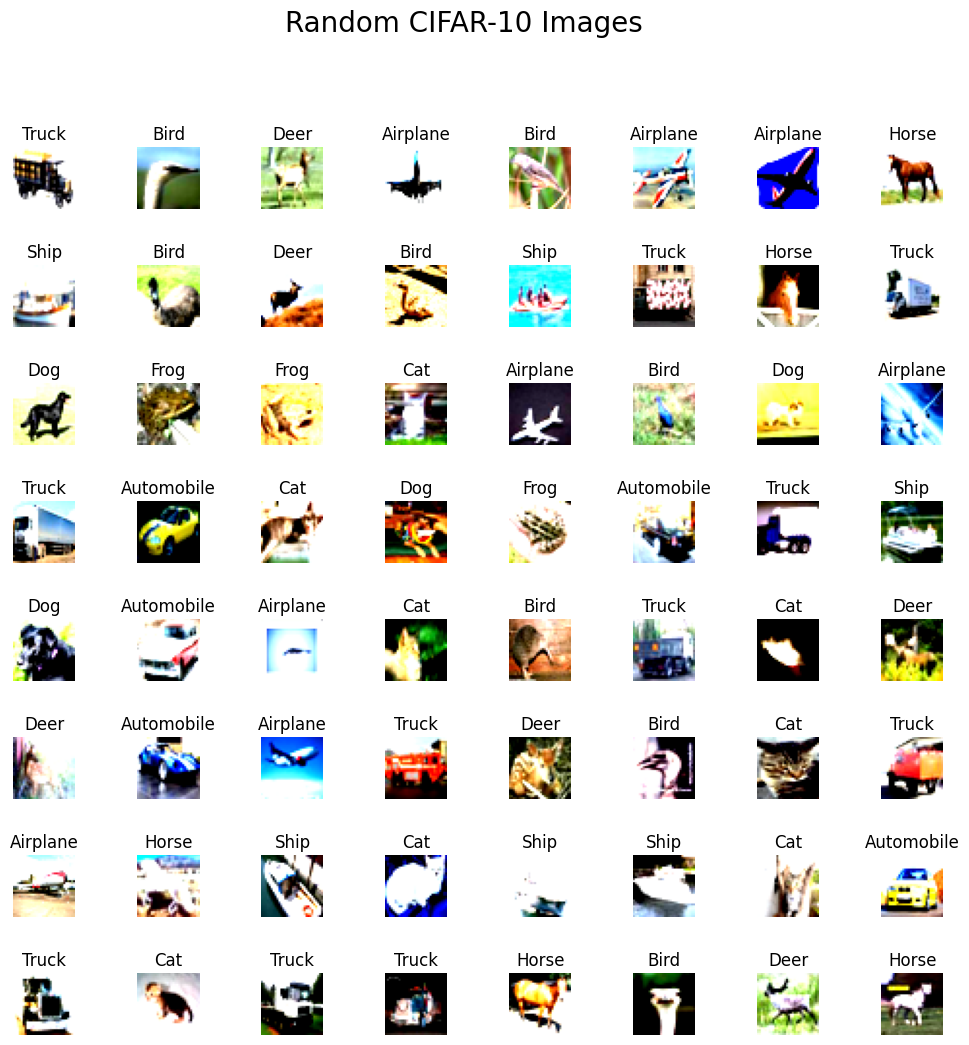

In [10]:
# Visualize images after normalizing pixel values
showImages(images_per_row, images_per_col, x_train, y_train, labels)

## <a id='toc2_7_'></a>[**Preprocessing label data (targets)**](#toc0_)

- Splits labels into either truck (1) or not truck (0)

In [11]:
# Converting the multiclass labels (0 to 9) into binary labels where: 1 means the image is truck and 0 = it's all other classes
selected_class = 9  # Truck

y_train_binary = (y_train == selected_class).astype(int)
y_test_binary = (y_test == selected_class).astype(int)
y_val_binary = (y_val == selected_class).astype(int)

## <a id='toc2_8_'></a>[**Class Distribution**](#toc0_)

- Weighing instead of undersampling -> No loss of information. 
    - Potential downside: Model focuses on minority class -> Not performing well for majority class 

In [12]:
counter = Counter(y_train_binary.flatten())
truck_count = 0
not_truck_count = 0
for label, count in counter.items():
    if label == 1:
        truck_count = count
    else:
        not_truck_count = count
    print(f'Class {label}: {count} samples')


Class 0: 72000 samples
Class 1: 8000 samples


Since class 0 is nine times larger than class 1, we will weigh class 1 nine times more than class 0.

## <a id='toc2_9_'></a>[**Building CNN**](#toc0_)
- Architecture: Inspired by VGG16, but simplified with fewer blocks and parameters for speed.
- First block:
    - 2 convolutional layers (32 filters, 3x3) for broad feature extraction
    - MaxPooling2D to reduce spatial dimensions and complexity
    - Dropout (0.2) to prevent overfitting
- Second, third, and fourth blocks:
    - Convolutional layers (filters increase: 64, 128, 256) to capture higher-level features
    - Increasing dropout (0.3 -> 0.5) to prevent overfitting as complexity grows
- Fully connected layers:
    - Flattened output to 1D
    - Dense layer 1 to learn complex patterns
    - Dropout
    - Dense layer 2 with Sigmoid activation for binary classification
- The model leverages VGG16 techniques like L2 regularization and dropout to reduce overfitting, while staying simple and efficient (Nekouei, 2023).

In [13]:
model = Sequential()
# block 1
model.add(Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(32,32,3), kernel_regularizer=l2(0.0001))) 
model.add(Conv2D(32, (3,3), activation='relu', padding='same', kernel_regularizer=l2(0.0001)))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2))) 
model.add(Dropout(0.2)) 

# block 2
model.add(Conv2D(64, (3,3), activation='relu', padding='same', kernel_regularizer=l2(0.0001))) 
model.add(Conv2D(64, (3,3), activation='relu', padding='same', kernel_regularizer=l2(0.0001)))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.3))

# block 3
model.add(Conv2D(128, (3,3), activation='relu', padding='same', kernel_regularizer=l2(0.0001))) 
model.add(Conv2D(128, (3,3), activation='relu', padding='same', kernel_regularizer=l2(0.0001)))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.4))

# block 4
model.add(Conv2D(256, (3,3), activation='relu', padding='same', kernel_regularizer=l2(0.0001)))
model.add(Conv2D(256, (3,3), activation='relu', padding='same', kernel_regularizer=l2(0.0001)))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.5))

# fully connected layer
model.add(Flatten()) 
model.add(Dense(256, activation='relu', kernel_regularizer=l2(0.001))) 
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid')) 

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 16, 16, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 64)        36928     
                                                        

## <a id='toc2_10_'></a>[**Training the model**](#toc0_)

Trained for 25 epochs (or until early stopping)
- Callback functions: 
    - *EarlyStopping*: Stops training if validation loss doesn’t improve for 5 epochs, saving time and preventing overfitting.
    - *ReduceLROnPlateau*: Reduces LR by 0.5 when val_loss rises for 2 consecutive epochs. Helps the model converge to the global minimum
- AdamW: A variation of Adam that includes weight decay for better regularization. It helps reduce overfitting by penalizing large weights, leading to more stable training and improved generalization, especially on unseen test data.

- binary_crossentropy: Classifies data into two categories, measuring the difference between the true value and the predicted value. It minimizes prediction errors, and calculates how far sigmoid deviates from the truth.

In [14]:
loss = 'binary_crossentropy'
opt = tfa.optimizers.AdamW(learning_rate=1e-4, weight_decay=1e-4)
metrics = ['accuracy']

model.compile(loss=loss, optimizer=opt, metrics=metrics)

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=2, min_lr=1e-7)

class_weight = {0: 1., 1: 9.} 
hist = model.fit(x_train, y_train_binary,
                 epochs=25,
                 validation_data=(x_val, y_val_binary),
                 class_weight=class_weight,
                 callbacks=[early_stopping, reduce_lr])

Epoch 1/25
2500/2500 [==============================] - 316s 125ms/step - loss: 1.0548 - accuracy: 0.7524 - val_loss: 0.4339 - val_accuracy: 0.8590 - lr: 1.0000e-04
Epoch 2/25
2500/2500 [==============================] - 317s 127ms/step - loss: 0.6684 - accuracy: 0.8551 - val_loss: 0.2930 - val_accuracy: 0.9022 - lr: 1.0000e-04
Epoch 3/25
2500/2500 [==============================] - 316s 126ms/step - loss: 0.5384 - accuracy: 0.8804 - val_loss: 0.3706 - val_accuracy: 0.8483 - lr: 1.0000e-04
Epoch 4/25
2500/2500 [==============================] - 311s 124ms/step - loss: 0.4750 - accuracy: 0.8966 - val_loss: 0.1733 - val_accuracy: 0.9528 - lr: 1.0000e-04
Epoch 5/25
2500/2500 [==============================] - 317s 127ms/step - loss: 0.4392 - accuracy: 0.9041 - val_loss: 0.1276 - val_accuracy: 0.9609 - lr: 1.0000e-04
Epoch 6/25
2500/2500 [==============================] - 318s 127ms/step - loss: 0.4255 - accuracy: 0.9074 - val_loss: 0.2614 - val_accuracy: 0.8998 - lr: 1.0000e-04
Epoch 7/25

## <a id='toc2_11_'></a>[**Visualizing model performance**](#toc0_)

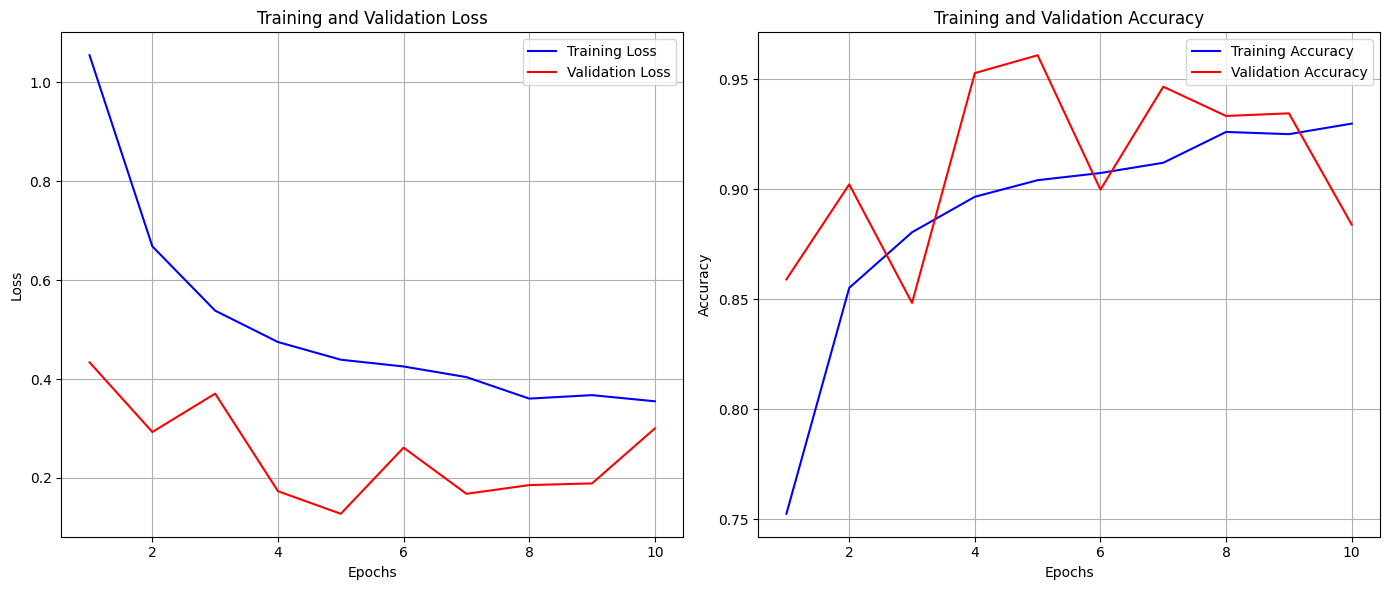

In [21]:
# Extract metrics from the training history
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
loss = hist.history['loss']
val_loss = hist.history['val_loss']
epochs = range(1, len(acc) + 1)

# Set up the figure and axes
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Plot Loss
ax1.plot(epochs, loss, 'b-', label='Training Loss')
ax1.plot(epochs, val_loss, 'r-', label='Validation Loss')
ax1.set_title('Training and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.legend()
ax1.grid(True)

# Plot Accuracy
ax2.plot(epochs, acc, 'b-', label='Training Accuracy')
ax2.plot(epochs, val_acc, 'r-', label='Validation Accuracy')
ax2.set_title('Training and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.legend()
ax2.grid(True)

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

- Exponential decrease in training loss and increase in training accuracy: As expected
- Validation loss and accuracy:
    - Validation loss: starts low and decreases in a jagged manner, bottom at epoch 5 with increase after -> signs of overfitting  
    - Validation accuracy: starts high and increases with training, peaks at epoch 5 with a decrease after -> overfitting
- Epoch 5 is best -> Model generalizes well 

## <a id='toc2_12_'></a>[**Confusion Matrix**](#toc0_)

313/313 [==============================] - 7s 21ms/step


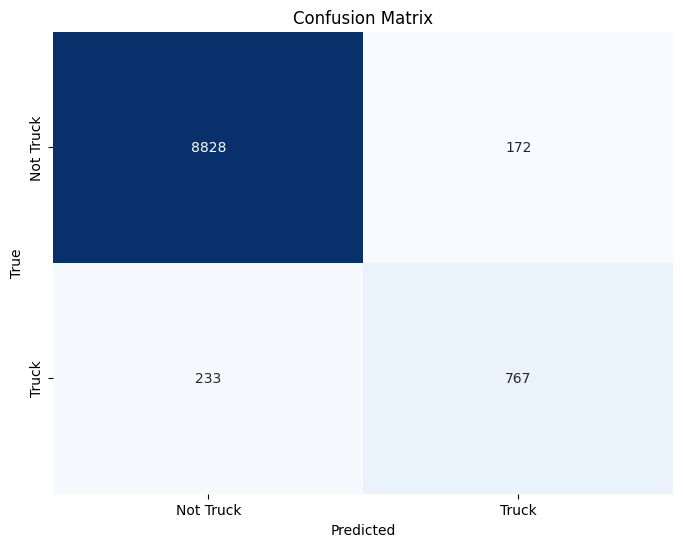

In [16]:
y_pred = model.predict(x_test)
y_pred_binary = (y_pred > 0.5).astype(int)
cm = confusion_matrix(y_test_binary, y_pred_binary)
cm_df = pd.DataFrame(cm, index=['Not Truck', 'Truck'], columns=['Not Truck', 'Truck'])
plt.figure(figsize=(8, 6))

import seaborn as sns
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

- High number of true negatives
- ≈81% of Truck predictions are correct -> high/moderate true positives 

- Model performs well on both classes, but is slightly better at identifying non-trucks than trucks.

## <a id='toc2_13_'></a>[**Evaluating the model**](#toc0_)

In [17]:
test_loss, test_acc = model.evaluate(x_test, y_test_binary)
print(f"Test accuracy: {test_acc}")

313/313 [==============================] - 7s 22ms/step - loss: 0.1311 - accuracy: 0.9595
Test accuracy: 0.9595000147819519


- High accuracy -> not informative as dataset is highly imbalanced

313/313 [==============================] - 7s 22ms/step


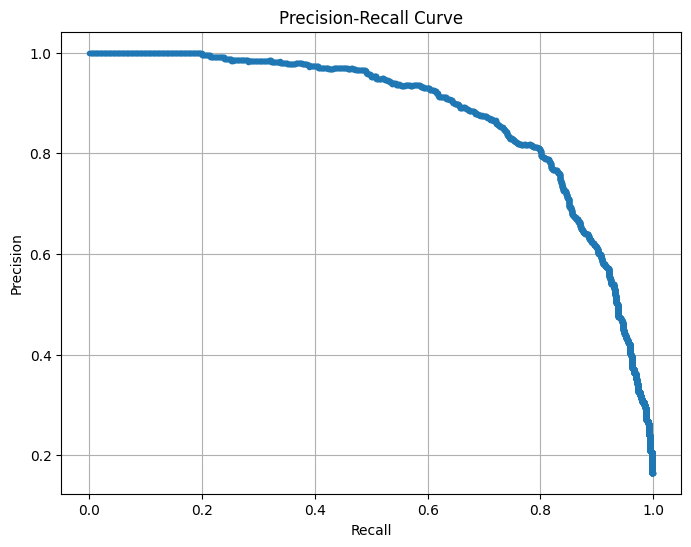

In [18]:
y_scores = model.predict(x_test)
precision, recall, thresholds = precision_recall_curve(y_test_binary, y_scores)
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.grid()
plt.show()

- Precision steadily decreases as recall increases, vice versa
- Model is very good at identifying trucks -> well-tuned 

## <a id='toc2_14_'></a>[**Model performance on an Out-of-Dataset Image**](#toc0_)

In [19]:
def predict(image_path):
    # Image loading and displaying
    image = cv2.imread(image_path)

    if image is None:
        raise ValueError("The image could not be loaded. Please check the file path or image format.")
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(image_rgb)
    plt.axis("off") 
    plt.show()

    # Image preprocessing
    image = cv2.resize(image, (32, 32))
    mean = np.mean(x_train, axis=(0, 1, 2), keepdims=True)
    std = np.std(x_train, axis=(0, 1, 2), keepdims=True)
    epsilon = 1e-7

    image = image.astype('float32')
    image = (image - mean) / (std + epsilon)

    # Make prediction
    predictions = model.predict(image)
    print("Predictions:", predictions)

    confidence = predictions[0][0]  # The predicted probability

    if confidence > 0.5:
        print(f"Predicted: TRUCK ({confidence * 100:.2f}% confidence)")
    else:
        print(f"Predicted: NOT TRUCK ({(1 - confidence) * 100:.2f}% confidence)")


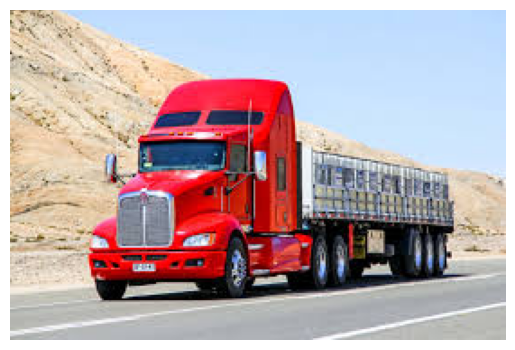

1/1 [==============================] - 0s 20ms/step
Predictions: [[1.]]
Predicted: TRUCK (100.00% confidence)


In [20]:
predict("truck.jpg")

## <a id='toc2_15_'></a>[**Summary**](#toc0_)

- The model performs well on CIFAR-10, achieving ~95% test accuracy.
- Training loss decreases and accuracy increases over time, indicating effective learning.
- Test set is 90% not-truck images, inflating test accuracy — not a fully reliable performance metric.
- Validation results show more fluctuation (as expected) but still indicate very good generalization.
- The model performs well on unseen validation data, suggesting it doesn’t overfit excessively.
- On an out-of-distribution truck image, the model predicted "truck" with 100% confidence.
- This reflects model overconfidence, typical of using sigmoid activation which outputs values close to 0 or 1.
- High confidence doesn’t always reflect true uncertainty — highlighting limitations of confidence as a reliability measure.

# <a id='toc3_'></a>[**Sources**](#toc0_)


Nekouei, F. (2023). *CIFAR-10 image classification with CNN*. Kaggle. https://www.kaggle.com/code/farzadnekouei/cifar-10-image-classification-with-cnn?fbclid=IwZXh0bgNhZW0CMTEAAR1jLLYXigenbIwcnb2iJ0kpGwtqx962gelYbNl7t8DfzWz-uHhCxiMMoWQ_aem_hDH6a5YUhNMjT4ukTNHnZw

Müller, A. C., & Guido, S. (2017). Introduction to machine learning with Python: A guide for data scientists. O'Reilly Media. Used for the heatmaps and visualization of the top features. Also used for general inspiration for our approach to task 1.